<a href="https://colab.research.google.com/github/pokem1402/section_project_one/blob/main/EDA_3_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load dataset

  EDA1, EDA2 과정에서 교정하고 정정한 데이터 셋을 부른다.


In [140]:
from google.colab import drive
import pandas as pd
import numpy as np
import colorcet as cc
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/dataset/vgames2_final.csv").drop(axis=1, columns="Unnamed: 0")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.Year = df.Year.astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16583 entries, 0 to 16582
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16583 non-null  object 
 1   Platform     16583 non-null  object 
 2   Year         16583 non-null  int64  
 3   Genre        16583 non-null  object 
 4   Publisher    16583 non-null  object 
 5   NA_Sales     16583 non-null  float64
 6   EU_Sales     16583 non-null  float64
 7   JP_Sales     16583 non-null  float64
 8   Other_Sales  16583 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


# 2. Data Visualization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print("게임 이름이 중복된 데이터 수 : ",df.Name.duplicated().sum())

게임 이름이 중복된 데이터 수 :  5101


데이터 내에는 플랫폼에 다중 발매되어 중복되는 데이터가 존재하는데 중복을 제거하여 체크해야하는 경우와 중복을 보존한채로 체크해야되는 경우가 존재하므로 제거시에는 따로 언급하였다.

다중 플랫폼에서 출시된 타이틀은 서로 같은 장르를 공유하기 때문에 이에 대해 각각 찾아서 수정하였다. (동명의 다른 게임이 존재할 수도 있으므로)

In [5]:
df_ = df.copy()

# 다중 플랫폼으로 출시된 타이틀의 판매량 합산
df_.Year = df_.Year.astype(str)
df_all_sum = df_.groupby(["Name", "Genre"], as_index=False).sum()
print(df_all_sum.Name.duplicated().sum())
df_all_sum[df_all_sum.Name.duplicated(keep=False)]
df_.Year = df_.Year.astype(int)

8


In [6]:
def data_modify_genre(df_, game_name, modified_value, category = "Genre"):
  print(df_[df_.Name==game_name][category])
  df_.loc[df_.Name==game_name,category] = modified_value
  print(df_[df_.Name==game_name][category])

In [7]:
# 데이터 교정 (다른 플랫폼 줄시인데 장르가 동일하지 않은 경우)
data_modify_genre(df_,"Cloudy With a Chance of Meatballs", "Adventure")
data_modify_genre(df_,"Culdcept", 'Strategy' )
data_modify_genre(df_,"Ice Hockey", 'Sports' )
data_modify_genre(df_,"Little Busters! Converted Edition", "Adventure" )
data_modify_genre(df_,"Skylanders Giants", "Platform" )
data_modify_genre(df_,"Steins;Gate: Hiyoku Renri no Darling", "Visual Novel" )
df_.loc[df_.Publisher=="EA Games", "Publisher"] = "Electronic Arts"
data_modify_genre(df_,"The Mummy: Tomb of the Dragon Emperor", "Adventure" )

3500      Platform
4985      Platform
5045      Platform
11258    Adventure
13054     Platform
Name: Genre, dtype: object
3500     Adventure
4985     Adventure
5045     Adventure
11258    Adventure
13054    Adventure
Name: Genre, dtype: object
2937    Strategy
8612        Misc
Name: Genre, dtype: object
2937    Strategy
8612    Strategy
Name: Genre, dtype: object
6175     Sports
12303      Misc
Name: Genre, dtype: object
6175     Sports
12303    Sports
Name: Genre, dtype: object
7508     Adventure
10761    Adventure
15073       Action
Name: Genre, dtype: object
7508     Adventure
10761    Adventure
15073    Adventure
Name: Genre, dtype: object
1046     Action
7177     Action
13196    Action
14053    Action
14918      Misc
Name: Genre, dtype: object
1046     Platform
7177     Platform
13196    Platform
14053    Platform
14918    Platform
Name: Genre, dtype: object
124     Adventure
4304    Adventure
8470       Action
Name: Genre, dtype: object
124     Visual Novel
4304    Visual Novel
8

In [8]:
# 다중 플랫폼으로 출시된 타이틀의 판매량 합산
df_all_sum = df_.groupby(["Name", "Genre"], as_index=False).sum()
print(df_all_sum.Name.duplicated().sum())
df_all_sum[df_all_sum.Name.duplicated(keep=False)]
# 결과로 나오는 하나는 둘이 다른 게임

1


,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9469,Syndicate,Shooter,4024,0.17,0.12,0.0,0.04
9470,Syndicate,Strategy,1992,0.00,0.05,0.0,0.01


## 1) One-variable charts

In [9]:
# (1) Platform

df.Platform = df.Platform.astype("category")

### (1) 플랫폼 별 타이틀 갯수

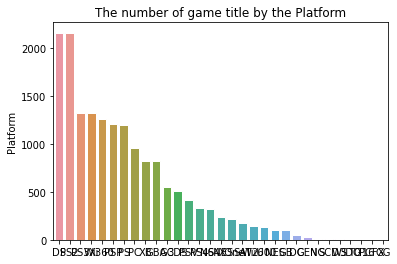

In [10]:
# (1) 플랫폼 별 타이틀 갯수

fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df.Platform.value_counts()
x = y.index
sns.barplot(x=x, y=y, order=df.Platform.value_counts().index)
plt.title("The number of game title by the Platform")
plt.show()

In [11]:
df.Platform.value_counts()

DS      2161
PS2     2159
PS3     1327
Wii     1323
X360    1264
PSP     1213
PS      1195
PC       958
XB       824
GBA      820
GC       556
3DS      508
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

#### <1> 데이터의 문제점 : 2022년, 혹은 이후를 대비하기엔 다소 오래된 데이터

 우리가 가진 데이터를 확인하면 전 시대를 걸쳐서 하나의 카테고리로 분류되었을 PC를 제외하고는 많은 비중을 차지하는 데이터들이 이전 세대의 플랫폼인 것을 확인할 수 있다.

그 외에는 2022년 현재에서 주요하게 사용되는 플랫폼인 Nintendo Switch(NS), PS5, Xbox Series X(XSX)에 대한 데이터는 존재하지 않는다. (PSV는 Playstation Vita의 줄임말로 Playstation Potable인 휴대용 플레이스테이션의 후속 기기이다)

따라서 플랫폼에 대한 데이터는 데이터의 분석의 목적인 ***다음 분기에 어떤 게임을 설계해야할까*** 에 대한 논의 중에 플랫폼에 대해서는 분석하는 것은 그른 결과를 도출할 수 있다고 할 수 있다.

##### <1>을 위한 보완할 수 있는 데이터 검증
- 특정 플랫폼의 이전 세대를 분석했을 때, 해당 플랫폼이라는 것이 판매량을 어느정도 견인해주는가?
- 즉, 플랫폼은 일종의 브랜드 파워를 지니고 있다고 ***가정하여*** 이전 데이터로 현재 존재하지 않는 현 세대의 플랫폼에 대해 추정할 수 있는 통계적 경향성을 내포한다고 할 수 있는가?
- 만약 특정 플랫폼이 이후의 기종에서도 타이틀 판매량이 꾸준하거나 상승했다면 해당 플랫폼은 인기가 있는 플랫폼이기 때문에 플랫폼으로 인해 출시된 게임에 악영향을 끼치는 요소는 없다고 볼 수 있다. 

### (2) 연도별 출시된 타이틀 수

The number of data : 16583


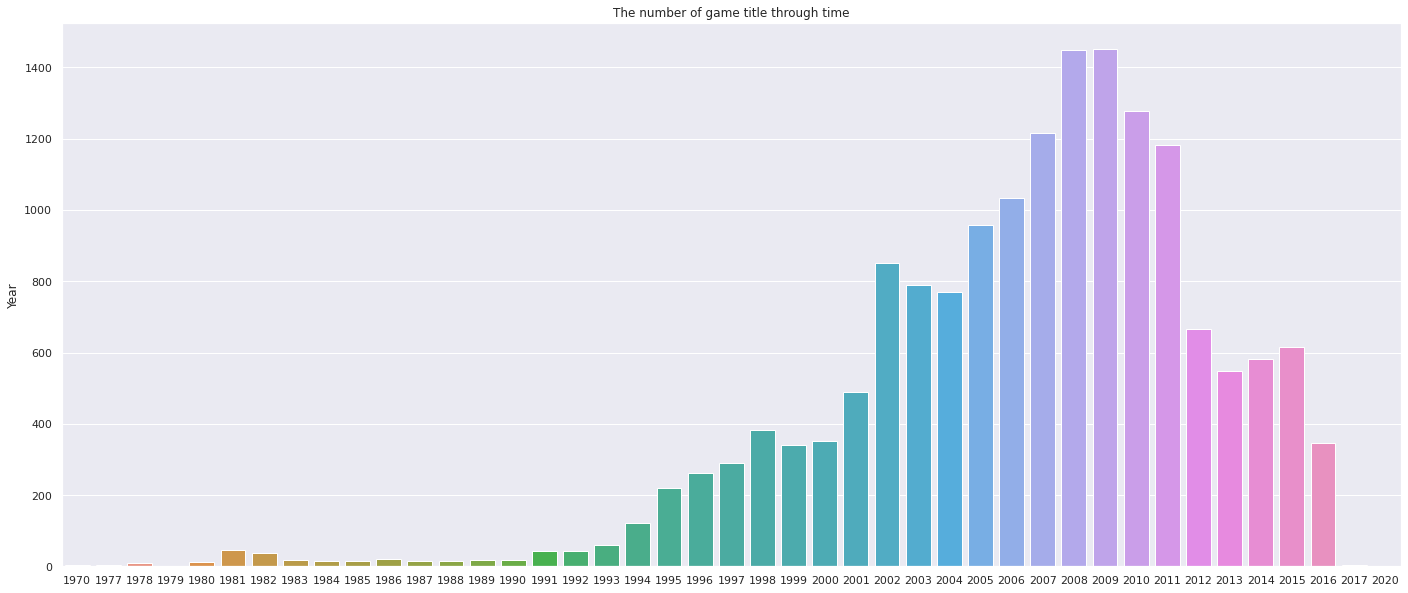

In [12]:
# (2) 연도별 출시된 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df_.Year.value_counts()
x = y.index
print("The number of data :", df.shape[0])
sns.barplot(x=x, y=y)
plt.title("The number of game title through time")
plt.show()

The number of data : 11482


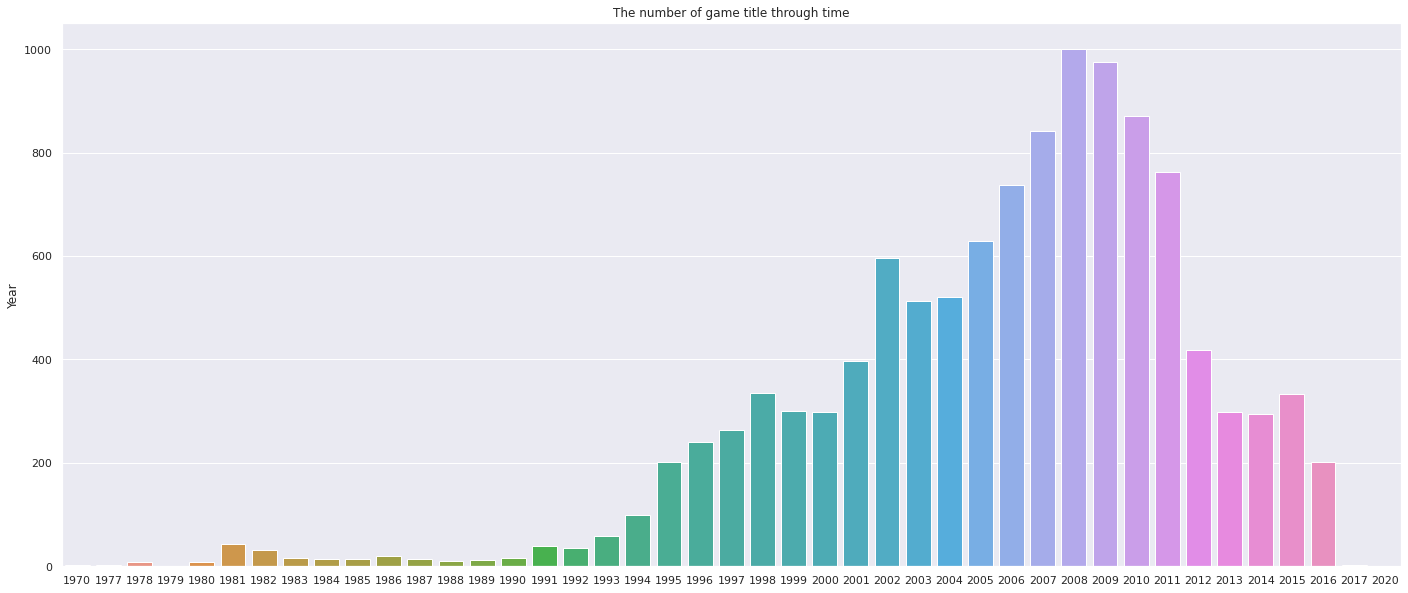

In [13]:
# (2) 연도별 출시된 타이틀 수 중 플랫폼 중복을 제외한 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
df_removed_duplicated = df_.drop_duplicates(subset=["Name"])

y = df_removed_duplicated.Year.value_counts()
x = y.index
print("The number of data :", df_removed_duplicated.shape[0])
sns.barplot(x=x, y=y)
plt.title("The number of game title through time")
plt.show()

같은 게임을 여러 플랫폼에 동시에 출시하여 같은 게임이 중복되어 체크될 수도 있기 때문에 이를 제거 한 뒤에 측정하더라도 데이터의 전체적인 경향성은 변경되지 않는다.

#### <2> 데이터의 문제점 : 2022년, 혹은 이후를 대비하기엔 다소 오래된 데이터

 우리가 가진 데이터를 확인하면 데이터를 주로 2008년 중심으로 종 모양으로 묘사된다고 할 수 있다.

하지만 의미 있는 데이터가 2017년까지인데 과연 그 전의 데이터가 2022년에 게임을 제작하기에 유용한 데이터인지는 의문이 든다.

따라서 2008년 중심으로 이루어진 데이터는 ***다음 분기에 어떤 게임을 설계해야할까*** 에 대해서 2008년에 인기가 있을법한 게임으로 도출될 가능성이 높다..

##### <2>을 위한 보완할 수 있는 데이터 검증
- 데이터는 2008년을 중심으로 종모양을 그리는 데이터가 맞지만 만약에 이하의 두 가지 가정이 성립한다면 해당 데이터를 2022년, 또는 그 이후에 발매할 게임을 설계하는 데에 좋은 지침을 얻을 수 있을 것이라고 생각할 수 있다.

게임성을 결정하는 요소는 스토리, 아트 스타일, 음악, 조작감, 등등이 존재하지만 데이터에 제시된 요소는 장르 뿐이므로 이후의 서술엔 장르에 대해서만 서술한다.

1.   특정 장르 가 시대의 흐름과 상관 없이 선호받는 게임이 존재할 경우 (장르 선호의 불변성)
2.   혹은 장르가 시대별로 유행이 있어서 현재 우리가 가지고 있는 데이터가 2022년의 유행을 커버할 수 있는 경우 ([게임이 개발되는데 소요되는 시간인 약 2년](https://www.econovill.com/news/articleView.html?idxno=513923)까진 유예할 수 있다) 

이후의 검증에서 1번과 2번에 대해 검증해볼 것이다. 만약에 분석 결과 1번 또는 2번을 만족하지 못한다면 현재 데이터로는 2022년 그리고 그 이후의 게임을 제작하는 데 있어서 좋은 참조가 되지 않을 가능성이 높다.



### (3) 장르별로 발매된 게임 타이틀 수

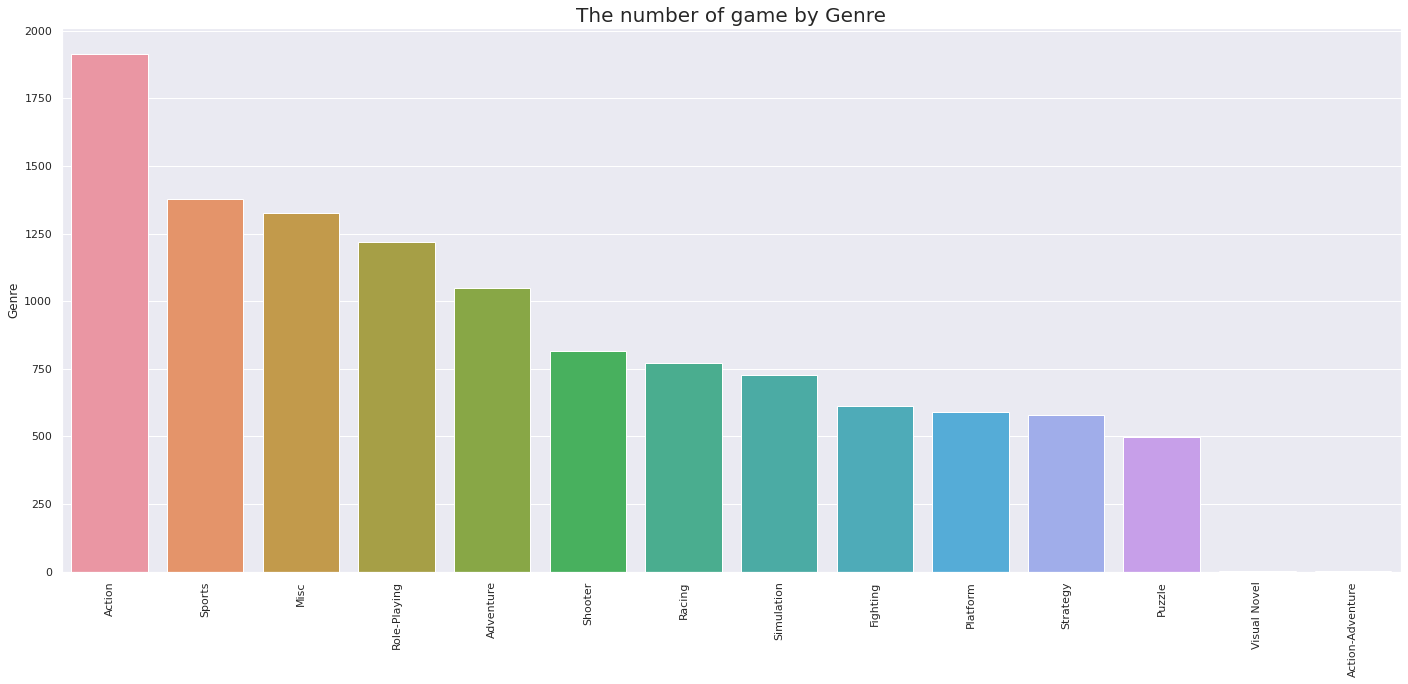

In [14]:
# (3) 플랫폼 중복을 제외한 뒤 장르별로 발매된 게임 타이틀 수
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)})
y = df_removed_duplicated.Genre.value_counts()
x = y.index
ax = sns.barplot(x=x, y=y)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("The number of game by Genre", fontsize=20)
plt.show()

In [15]:
df_removed_duplicated.Genre.value_counts()

Action              1913
Sports              1379
Misc                1324
Role-Playing        1219
Adventure           1049
Shooter              817
Racing               771
Simulation           726
Fighting             611
Platform             589
Strategy             581
Puzzle               499
Visual Novel           2
Action-Adventure       2
Name: Genre, dtype: int64

#### <3> 데이터의 문제점 : 다소 편중된 게임 장르

해당 데이터는 장르별로 제법 심각한 Bias가 존재한다. 따라서 상위에 있는 장르에 대한 검정 또는 분석은 상당히 의미 있는 결과를 가져오겠지만 하위, 특히 Action-Adventure 및 visual Novel의 경우에는 검정과 분석을 할 수 없을 정도로 데이터가 너무 적어서 해당 장르가 현 시대에서 매우 조명받는 게임 장르라고 할 지라도 분석 과정을 거치다보면 우리는 해당 장르에 대한 통계적 신뢰성이 보장되지 않는다. (해당 데이터들에 대한 평가는 장르의 유망성이 아니라 해당 게임의 성공 지표를 반영하게 될 것이기 때문에)

하지만 만약 우리가 가진 데이터가 주어진 기간에 발매된 게임들 중 의미 있는 (즉 판매량이 집계된) 데이터들이라는 가정 하에,  적어도 이런 편중 현상이 말하고자 하는 것은 다음과 같다고 이야기할 수 있다.

 데이터가 가르키는 기간 사이에 해당 장르에 대한 게임사의 선호도가 어떻게 되는가. (게이머들의 선호도는 판매량 요소를 반영해야하므로 정확히 맞지는 않다,)

##### <3>을 위한 보완할 수 있는 데이터 검증
- 그래프만 보면 장르에 대한 게임사들의 선호도를 대략적으로 짐작가능 하지만, 실제로 유저들이 해당 장르에 대한 선호도가 존재하여 해당 장르들이 추정할 수 없는 다른 이유 (제작비가 낮다. 빠르게 제작 가능하다 등 제작의 수월성 또는 데이터의 미비)로 인해 저런 편중이 발생한 건지 아니면 실제 수요로 인해 저런 편중이 발생한건지 확인할 필요가 있다.

- 하지만 아무리 유저들이 해당 장르를 좋아한다고 해도 해당하는 모든 장르의 게임을 구매할 가능성은 낮을 수 있다는 점을 유의할 필요가 있다.

### (4) 퍼블리셔 별로 발매된 게임 타이틀 수

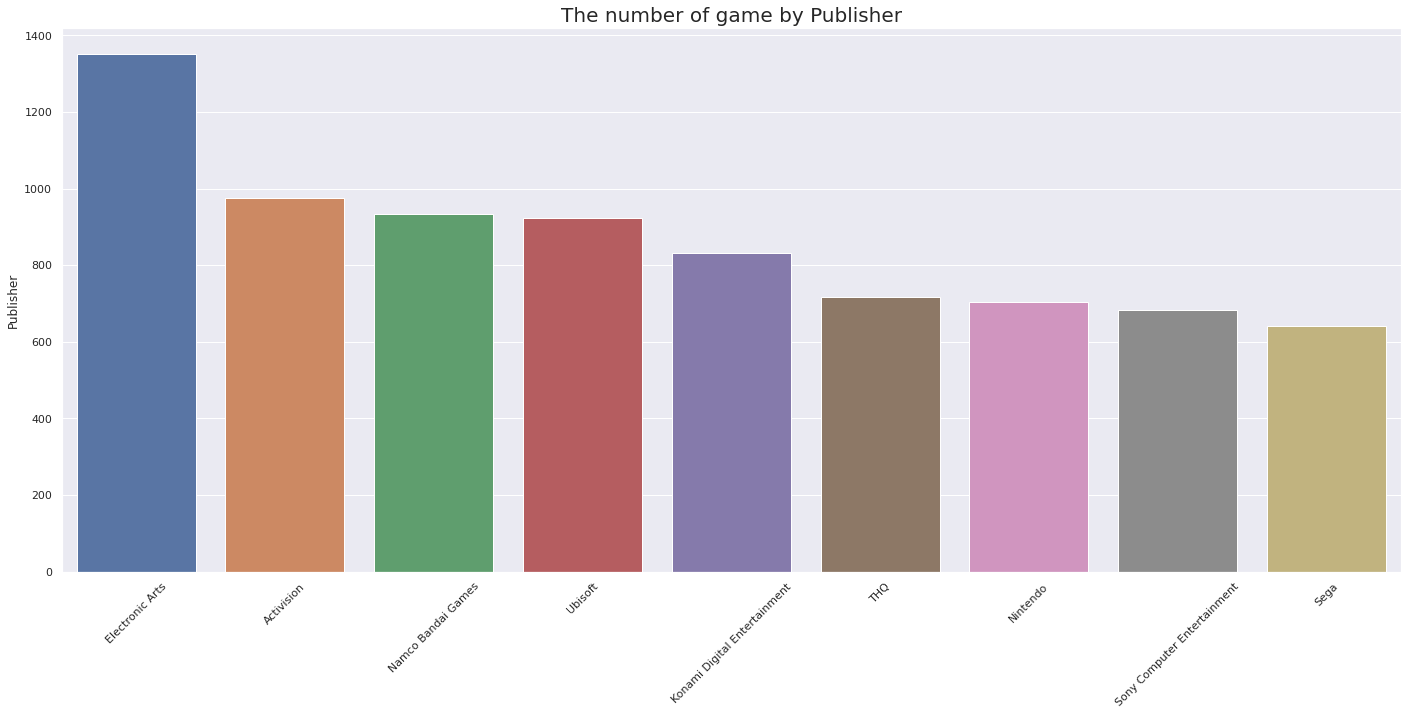

In [16]:
# (4) 퍼블리셔 별로 발매된 게임 타이틀 수
# 타이틀 중복이 플랫폼 별로 일어나긴 하지만 플랫폼에 따라 배급사가 다른 경우를 경우가 존재하므로 중복을 제외하지 않음.
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)}, font_scale = 2)
y = df_.Publisher.value_counts()

x = y.index

for i in range(1000):
  if (y > i).sum() < 10:
    x= y[y>i].index
    y = y[y>i]
    break;

ax = sns.barplot(x=x, y=y)
plt.title("The number of game by Publisher", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

수 많은 퍼블리셔 중에 최상위 10개를 추려서 그래프로 나타내었다. 실제 판매량을 들여다봐야겠지만 단순히 퍼블리셔만 두고 봤을 때는 Electronic Arts가 많은 수의 게임을 Publishing 하였다는 것을 확인할 수 있다.

판매량이 ***게임마다 일정했고 장르에 대한 선호성이 편중되지 않았다는 가정*** 이 존재한다면 우리가 만든 게임을 퍼블리싱할 때 Electroic Arts와 협상해보는 것이 좋은 선택일 수 있다.

In [17]:
df_.Year = df_.Year.astype(str)
df_all_sum = df_.groupby(["Name", "Genre", "Publisher"], as_index=False).sum()
df_.Year = df_.Year.astype(int)

### (5) 북미에서 가장 많이 팔린 타이틀

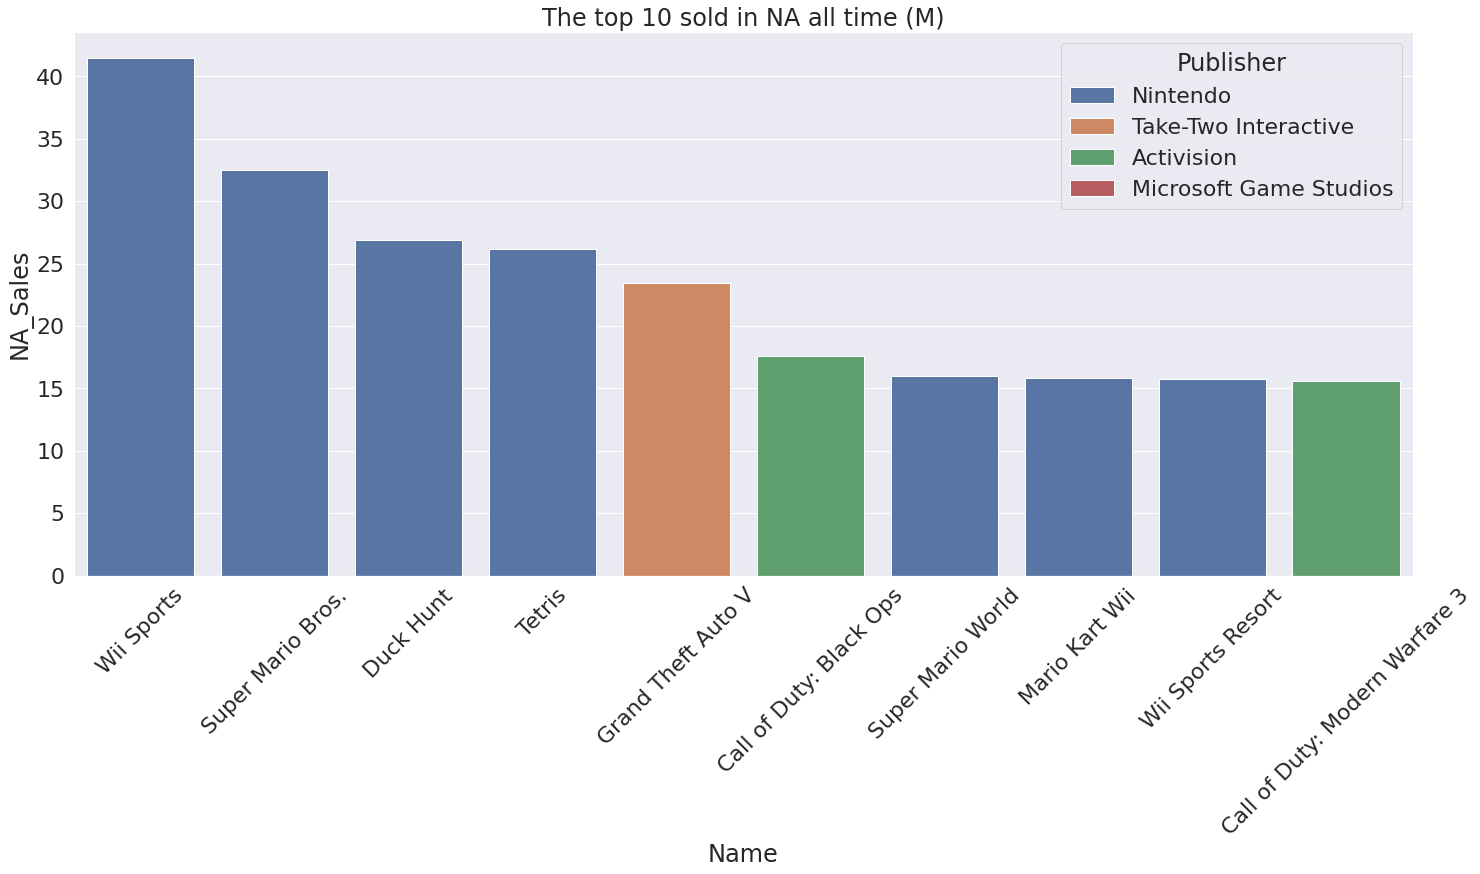

In [18]:
# (5) 북미에서 가장 많이 팔린 타이틀
df_all_sum.sort_values(["NA_Sales"], inplace=True, ascending=False)
df_all_sum.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(24,10)}, font_scale=2)
y = df_all_sum.NA_Sales.loc[:9]

x = df_all_sum.Name.loc[0:9]

ax = sns.barplot(x=x, y=y, hue=df_all_sum.Publisher.loc[:10], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("The top 10 sold in NA all time (M)")
plt.show()

In [19]:
for i in range(10):
  print(i+1, " : ", df_all_sum.Name.loc[i],",", df_all_sum.Publisher.loc[i])

1  :  Wii Sports , Nintendo
2  :  Super Mario Bros. , Nintendo
3  :  Duck Hunt , Nintendo
4  :  Tetris , Nintendo
5  :  Grand Theft Auto V , Take-Two Interactive
6  :  Call of Duty: Black Ops , Activision
7  :  Super Mario World , Nintendo
8  :  Mario Kart Wii , Nintendo
9  :  Wii Sports Resort , Nintendo
10  :  Call of Duty: Modern Warfare 3 , Activision


북미에서 가장 많이 팔린 10개의 타이틀은 위의 10개인데, 독특한 점은 4개 타이틀을 제외한 나머지 제품이 Nintendo 사 게임이라는 사실이다.

### (6) 유럽에서 가장 많이 팔린 타이틀

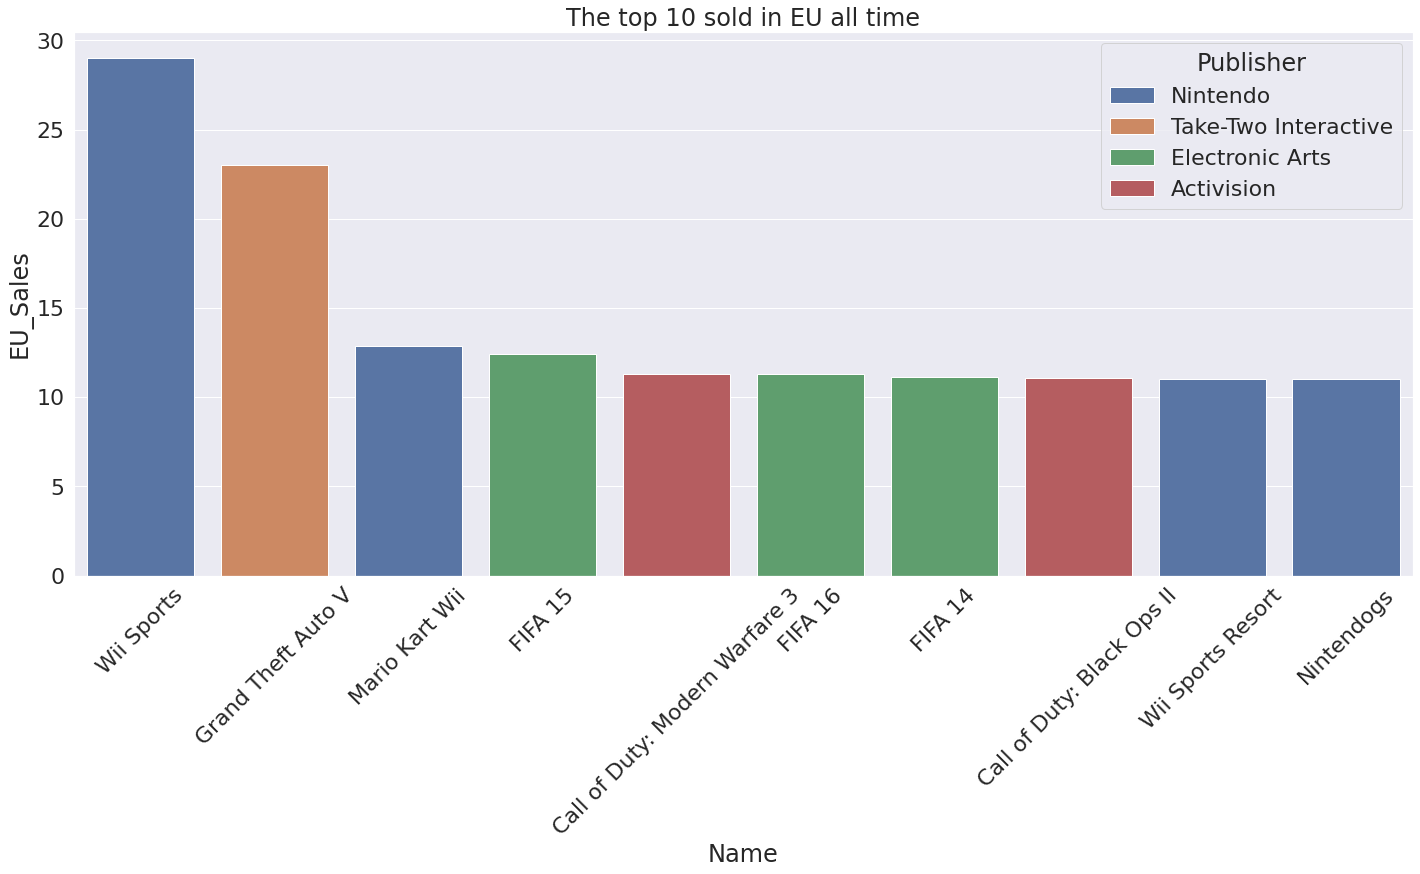

In [20]:
# (6) 유럽에서 가장 많이 팔린 타이틀
df_all_sum.sort_values(["EU_Sales"], inplace=True, ascending=False)
df_all_sum.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)}, font_scale = 2)
y = df_all_sum.EU_Sales.loc[:9]

x = df_all_sum.Name.loc[0:9]

sns.barplot(x=x, y=y, hue=df_all_sum.Publisher.loc[:10], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("The top 10 sold in EU all time")
plt.show()

In [21]:
for i in range(10):
  print(i+1, " : ", df_.Name.loc[i],",", df_all_sum.Publisher.loc[i])

1  :  Candace Kane's Candy Factory , Nintendo
2  :  The Munchables , Take-Two Interactive
3  :  Otome wa Oanesama Boku ni Koi Shiteru Portable , Nintendo
4  :  Deal or No Deal: Special Edition , Electronic Arts
5  :  Ben 10 Ultimate Alien: Cosmic Destruction , Activision
6  :  Power Pro Kun Pocket 8 , Electronic Arts
7  :  JASF: Jane's Advanced Strike Fighters , Electronic Arts
8  :  Samurai Warriors: State of War , Activision
9  :  Imabikisou , Nintendo
10  :  The Penguins of Madagascar: Dr. Blowhole Returns - Again! , Nintendo


Eu 지역도 마찬가지로 nintendo 게임이 강세이지만, 북미에 비해선 비교적으로 10위 권이 여러 배급사 게임으로 분배되어있고 특징은, GTA 및 Call of Duty, nintendogs를 제외하고는 스포츠 테마 중심이라는 점이다.

### (7) 일본에서 가장 많이 팔린 타이틀

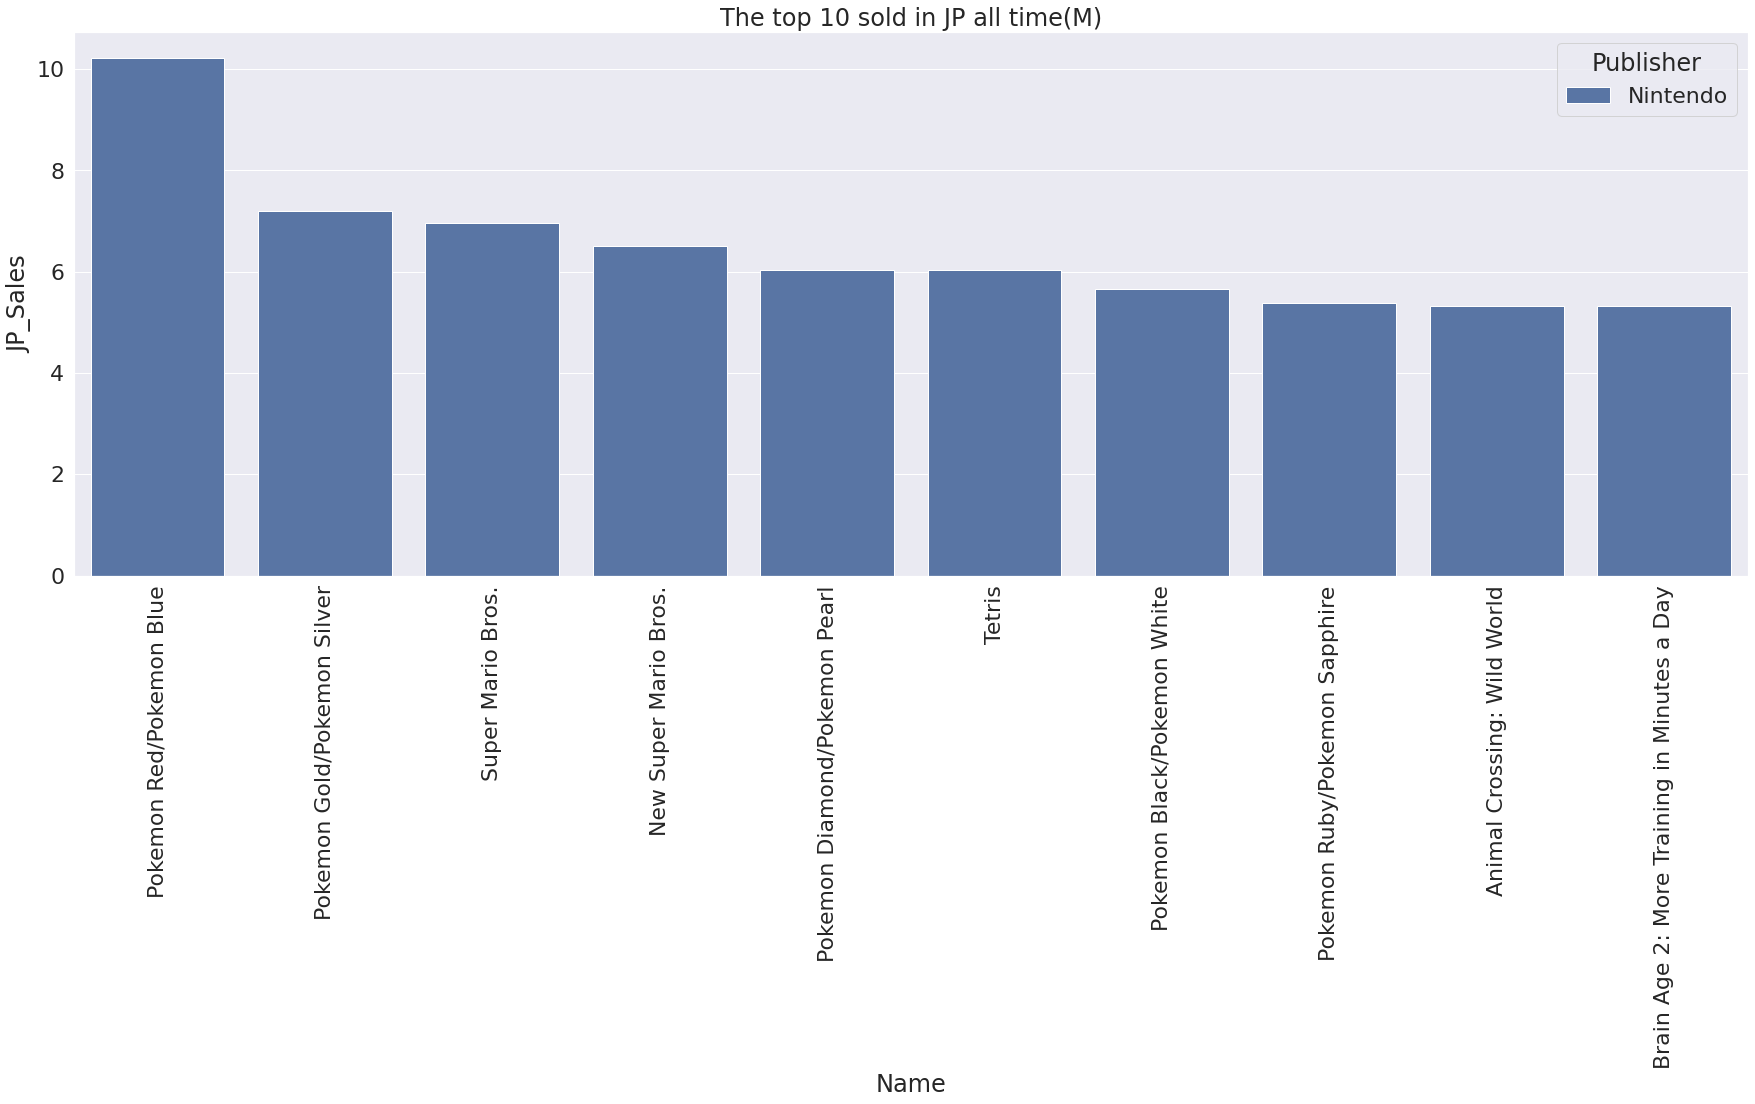

In [22]:
# (7) 일본에서 가장 많이 팔린 타이틀
df_all_sum.sort_values(["JP_Sales"], inplace=True, ascending=False)
df_all_sum.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)}, font_scale=2)
y = df_all_sum.JP_Sales.loc[:9]

x = df_all_sum.Name.loc[:9]

sns.barplot(x=x, y=y, hue=df_all_sum.Publisher.loc[:9], dodge=False)
plt.title("The top 10 sold in JP all time(M)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [23]:
for i in range(10):
  print(i+1, " : ", df_all_sum.Name.loc[i],",", df_all_sum.Publisher.loc[i])

1  :  Pokemon Red/Pokemon Blue , Nintendo
2  :  Pokemon Gold/Pokemon Silver , Nintendo
3  :  Super Mario Bros. , Nintendo
4  :  New Super Mario Bros. , Nintendo
5  :  Pokemon Diamond/Pokemon Pearl , Nintendo
6  :  Tetris , Nintendo
7  :  Pokemon Black/Pokemon White , Nintendo
8  :  Pokemon Ruby/Pokemon Sapphire , Nintendo
9  :  Animal Crossing: Wild World , Nintendo
10  :  Brain Age 2: More Training in Minutes a Day , Nintendo


일본 지역의 Nintendo가 상위 10개를 모두 차지하였는데, 그중 타이틀의 대부분이 Pokemon이 차지한다는 점이다. 더욱이 특기할만한 점은 대부분의 pokemon 시리즈는 단일 플랫폼에서만 출시되었고, 이후 세대에는 이식되지 않았었다는 사실이다. 즉  각 시리즈는 단일 판매량으로만으로 상위에 들었다는 사실이다.

 EDA1 과정에서 Pokemon X/Pokemon Y가 삭제되었는데, 만약 이를 포함했다면 1에서 10위까지 모두 nintendo 회사의 제품이며 그 중에서도 6개가 포켓몬이었을 것이다.

In [24]:
df_[df_.Name == "Pokemon Red/Pokemon Blue"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7823,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0


### (8) 기타 지역에서 가장 많이 팔린 타이틀

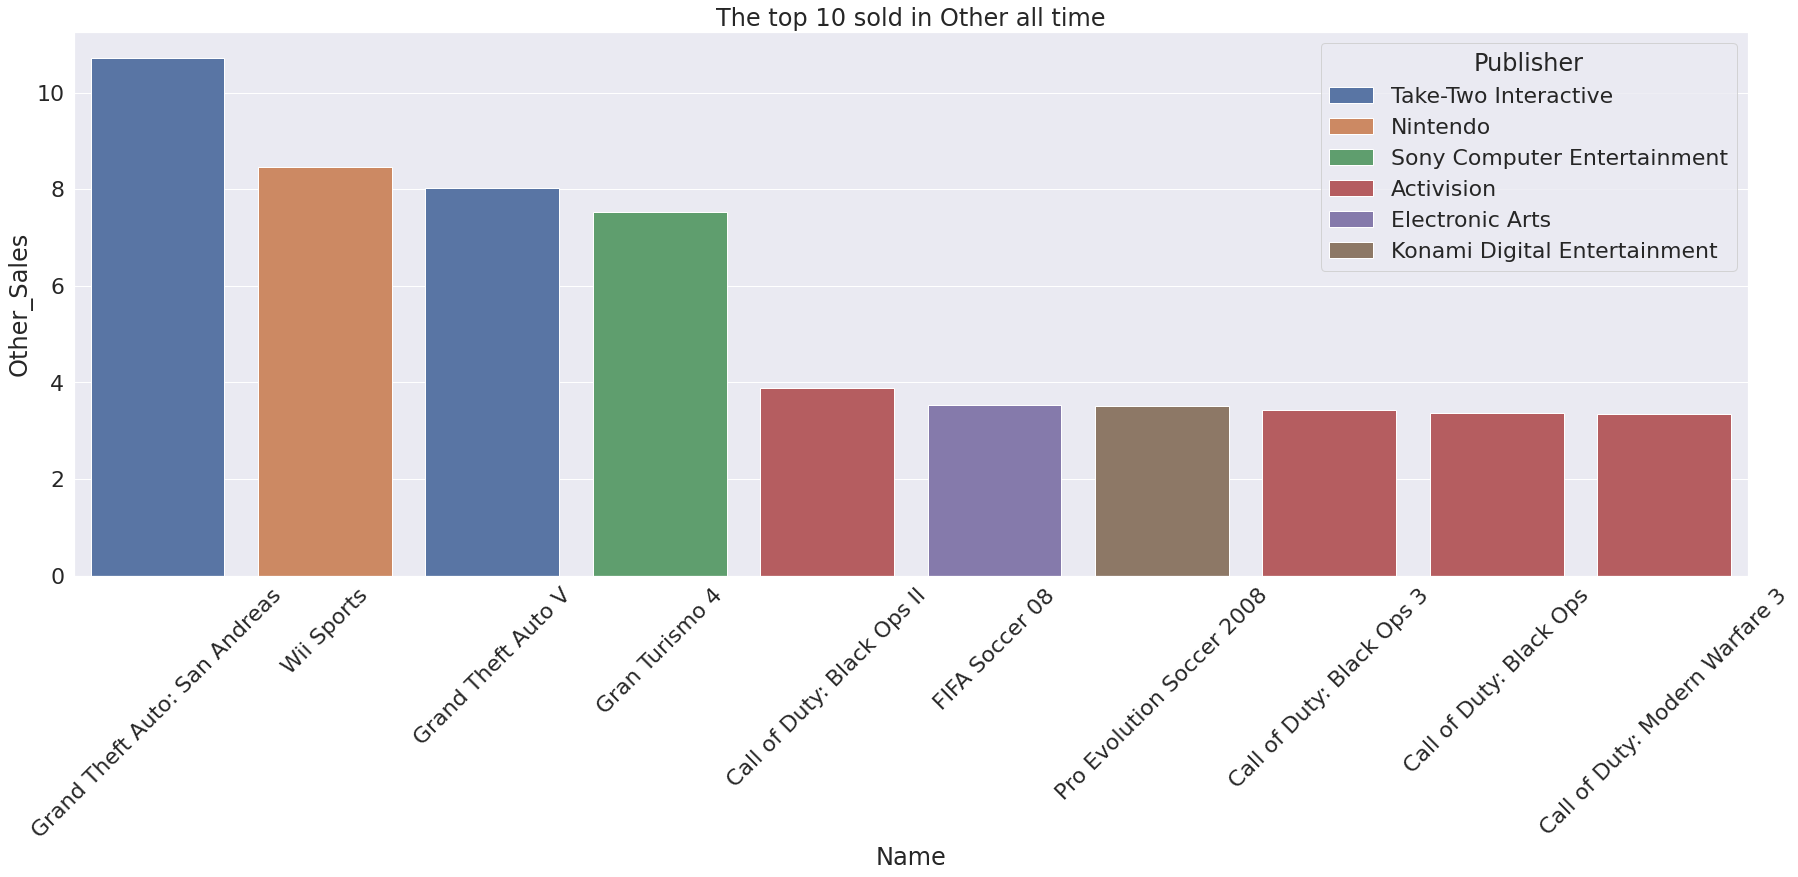

In [25]:
# (8) 기타 지역에서 가장 많이 팔린 타이틀
df_all_sum.sort_values(["Other_Sales"], inplace=True, ascending=False)
df_all_sum.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(30,10)}, font_scale=2)
y = df_all_sum.Other_Sales.loc[:9]

x = df_all_sum.Name.loc[0:9]

sns.barplot(x=x, y=y, hue=df_all_sum.Publisher.loc[:9], dodge=False)
plt.title("The top 10 sold in Other all time")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

In [26]:
for i in range(10):
  print(i+1, " : ", df_all_sum.Name.loc[i],",", df_all_sum.Publisher.loc[i])

1  :  Grand Theft Auto: San Andreas , Take-Two Interactive
2  :  Wii Sports , Nintendo
3  :  Grand Theft Auto V , Take-Two Interactive
4  :  Gran Turismo 4 , Sony Computer Entertainment
5  :  Call of Duty: Black Ops II , Activision
6  :  FIFA Soccer 08 , Electronic Arts
7  :  Pro Evolution Soccer 2008 , Konami Digital Entertainment
8  :  Call of Duty: Black Ops 3 , Activision
9  :  Call of Duty: Black Ops , Activision
10  :  Call of Duty: Modern Warfare 3 , Activision


그외 지역은 아무래도 다양한 나라와 문화를 엮어서 하나의 표로 만들어서 그러한지 특정 게임 회사 선호 경향이 적어진 것을 확인할 수 있으며 전반적으로 Shooting game에 대한 선호도가 높은 것을 확인할 수 있다.

### (9) 지역별 판매량 비교

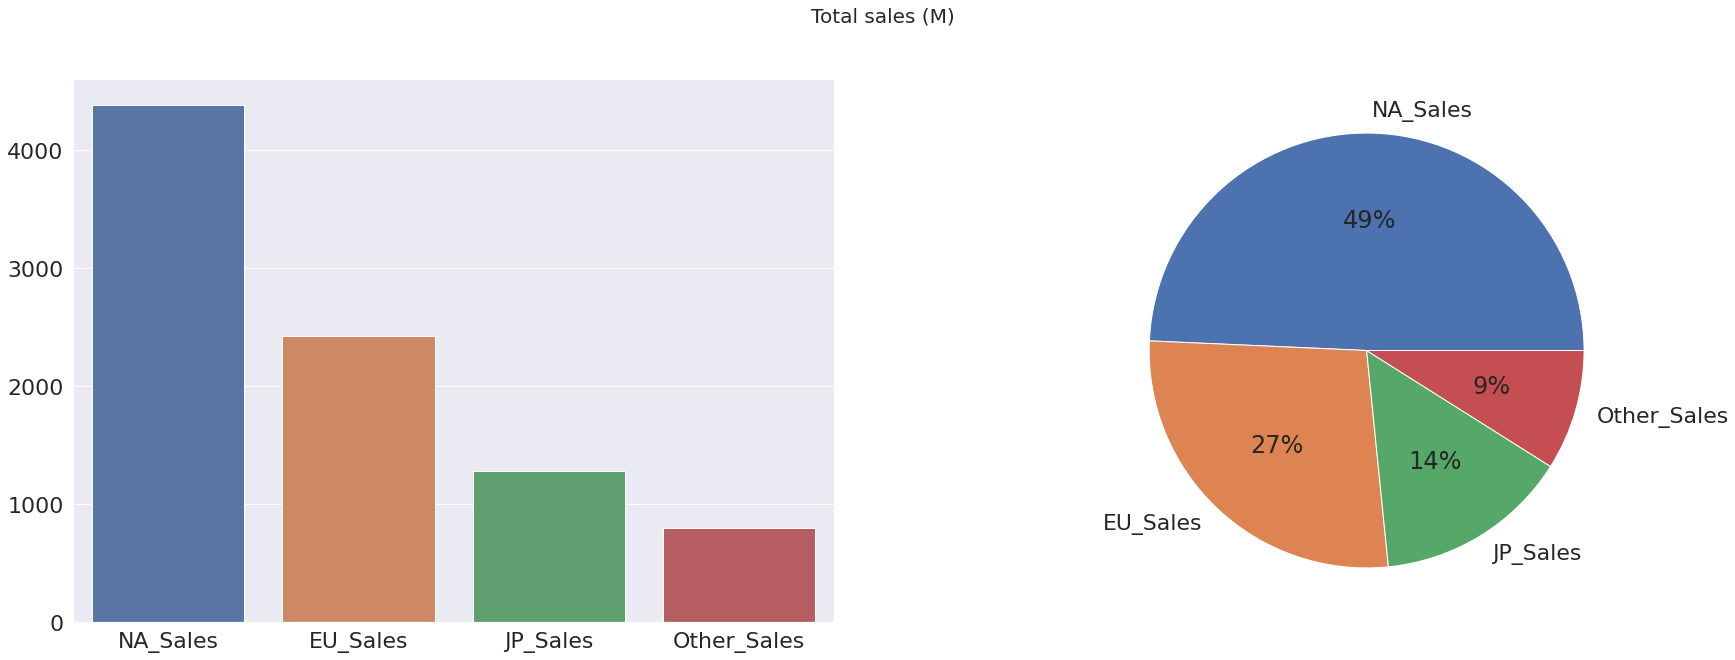

In [27]:
fig, (bar, pie) = plt.subplots(1,2)

sns.set(font_scale = 2)
y = df_.take(range(5,9), axis=1).sum(axis=0)
x = y.index

bar = sns.barplot(ax=bar, x=x, y=y, dodge=False)
pie.pie(y, labels = x, autopct='%.0f%%')
plt.suptitle("Total sales (M)", fontsize=20)
plt.show()

전체 매출액을 비교했을 때의 그래프는 위와 같다.

## 2) Data Over Time

In [28]:
def get_counts_among_two_value(x, y, df, threshold = 0):

  if (threshold > 0):
    accepted = (df[y].value_counts() > threshold).to_frame()
    accected_attr = sorted(accepted.index[accepted[y]].to_list())
  # print(accected_attr)
  # df_ = df.copy()
  data = df[[y,x]].value_counts()
  # print(data[accected_attr])
  if (threshold >0):
    data = data[accected_attr]
  data = data.unstack(level=1).transpose().fillna(0)
  return data

In [29]:
get_counts_among_two_value("Year", "Platform", df_).head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1977,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (1) 최근에 게임들은 어떤 플랫폼에 출시되고 있는가?

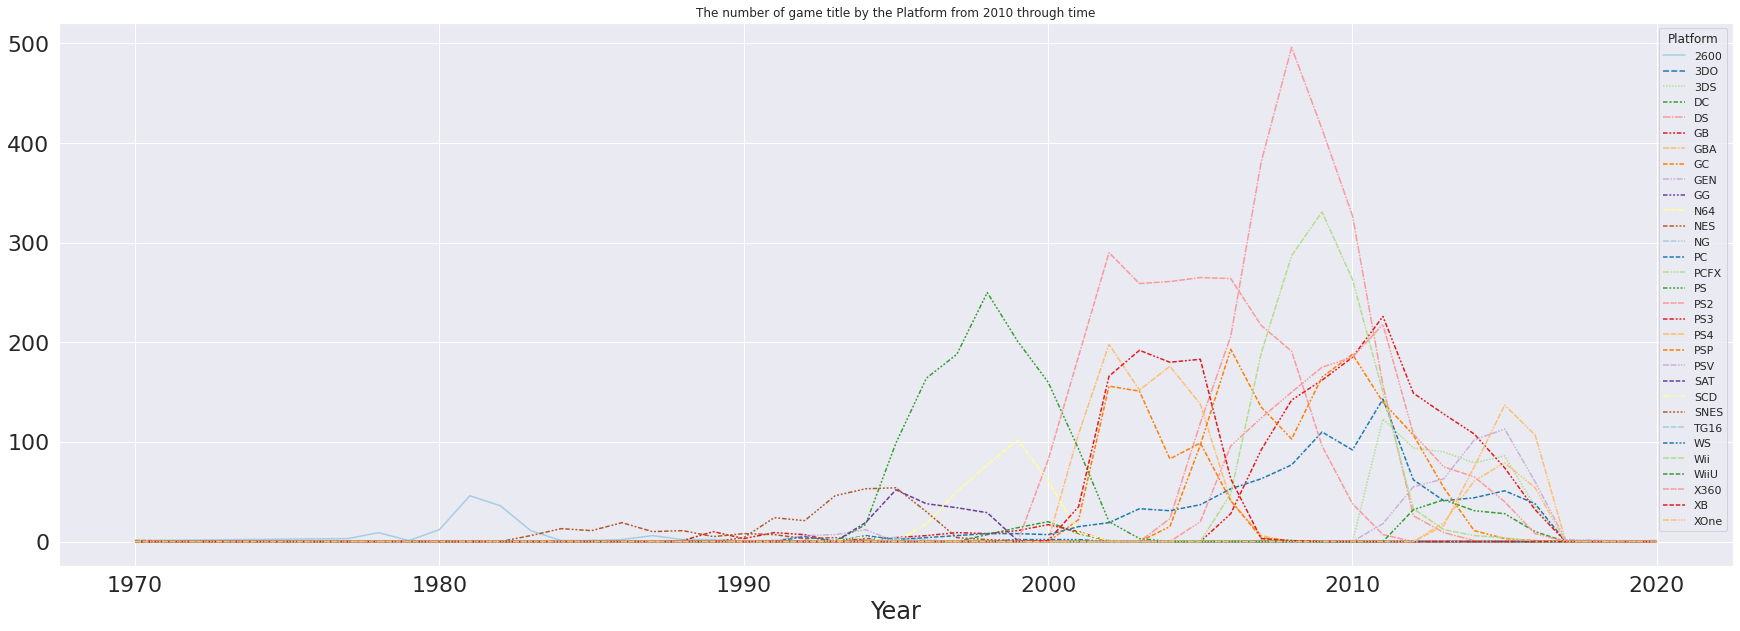

In [30]:
# 전 데이터 플롯
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Platform", df_)

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=data, palette="Paired")
plt.title("The number of game title by the Platform from 2010 through time")
plt.show()

데이터가 많아서 해석하기 힘들고 우리가 원하는 것은 가장 최신 트렌드이므로 2015년 이후의 데이터를 확인하는 것으로 하자.

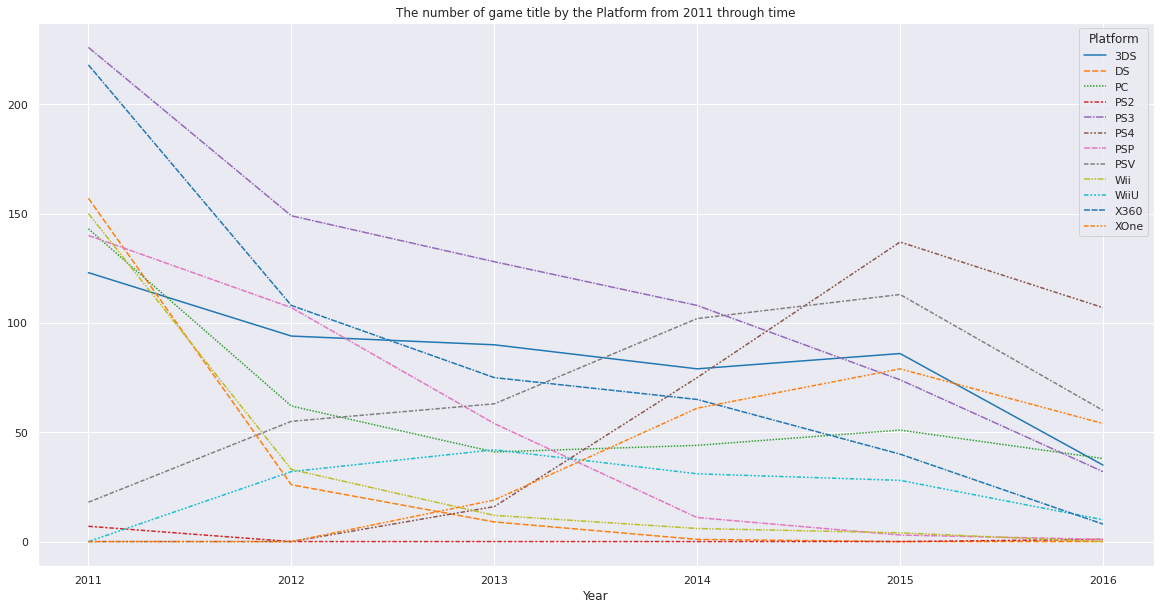

In [31]:
# 2010년 이전의 데이터는 제외 후 출력
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Platform", df_)

data_filter = data.loc["2011":"2016"]
data_filter = data_filter.loc[:, data_filter.sum(axis=0) > 0]
data_filter.columns = data_filter.columns.astype("str")

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=pd.DataFrame(data_filter), palette="tab10")
plt.title("The number of game title by the Platform from 2011 through time")
plt.show()

아마 2017 년 이후로는 데이터 부족으로 각 항목이 0으로 수렴하는 것으로 보여서 2016년 까지의 데이터를 출력하였다. 하지만 그전에서의 경향성을 살펴보면 

상대적으로 구 기종인 3ds, ds, ps2, ps3, psp, wii, wiiU는 하락하는 추세이고

상대적으로 신 기종인 psv, ps4, XOne는 상승하는 추세를 보였다.



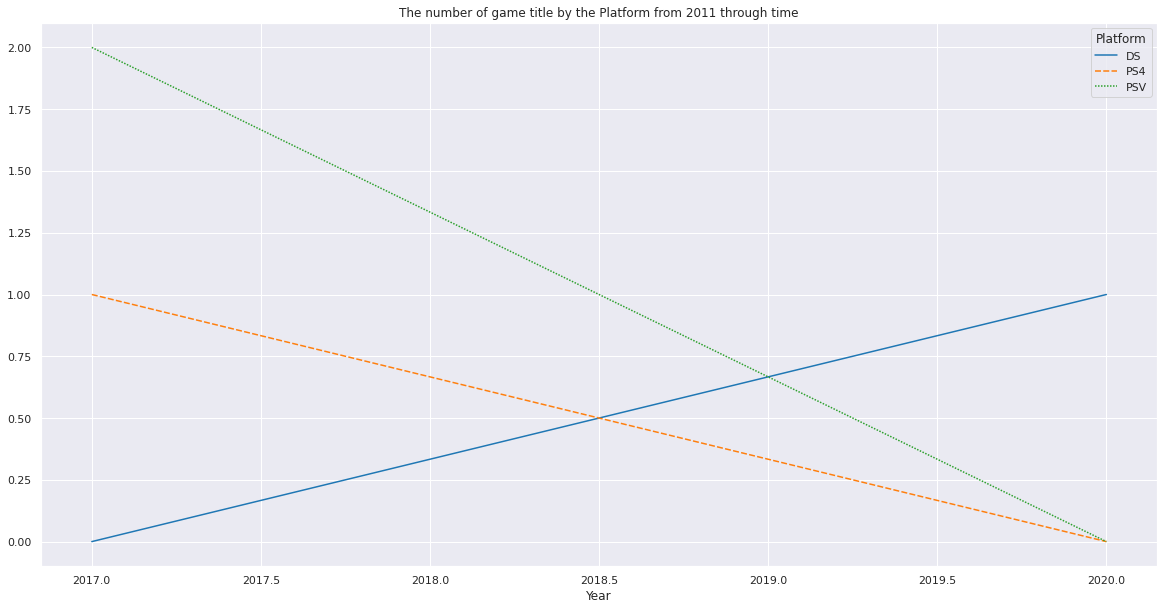

In [32]:
# 2017년 이후의 데이터는 어떨까?
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Platform", df_)

data_filter = data.loc["2017":"2020"]
data_filter = data_filter.loc[:, data_filter.sum(axis=0) > 0]
data_filter.columns = data_filter.columns.astype("str")

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=pd.DataFrame(data_filter), palette="tab10")
plt.title("The number of game title by the Platform from 2011 through time")
plt.show()

### (2) 시간에 따라 발매된 게임의 장르의 추세는 어떠한가?

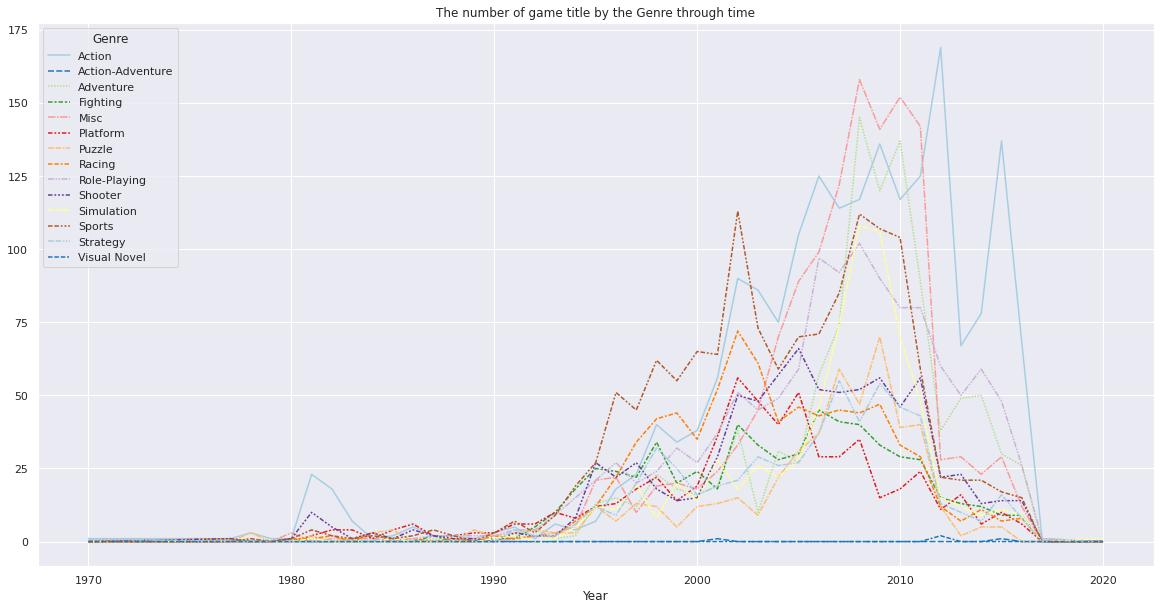

In [33]:
# 다중 플랫폼에 출시된 항목 제거
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Genre", df_removed_duplicated)

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=data, palette="Paired")
plt.title("The number of game title by the Genre through time")
plt.show()

전체적인 도표를 보기 어렵기 때문에 시간축의 범위를 2000년대 이후로 조절한다. 그리고 1)의 (3)에서 본 것처럼 10미만의 데이터는 표기의 편의성을 위해 threshold로 표기하지 않도록 한다.

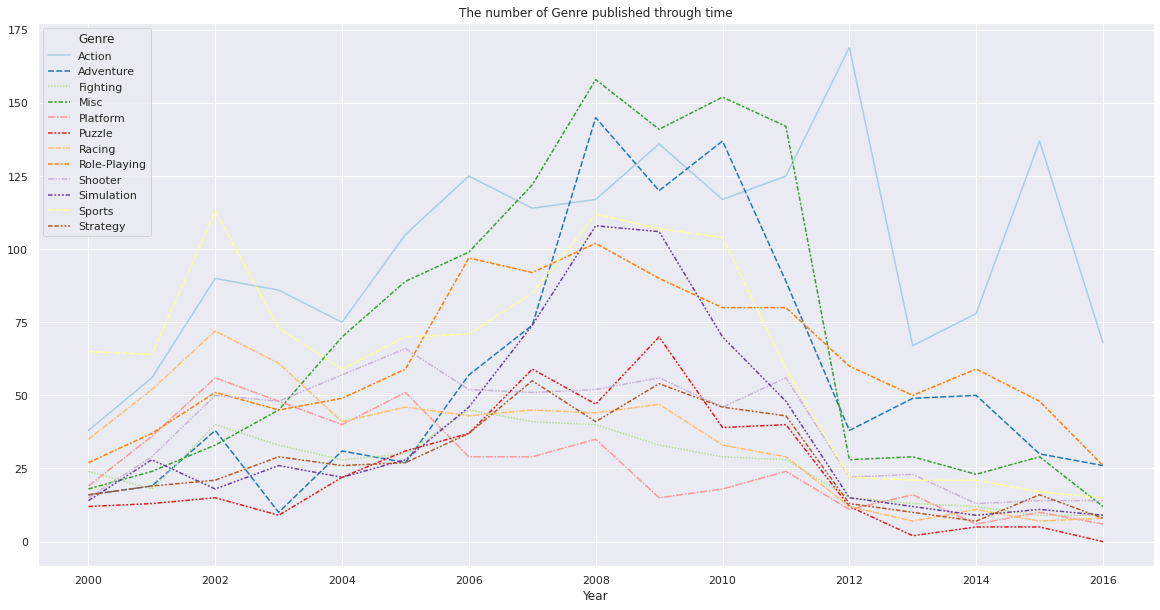

In [34]:
# 2000년 이후의 게임 장르
fig, ax = plt.subplots()

data = get_counts_among_two_value("Year", "Genre", df_removed_duplicated, threshold=10)

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=data.loc["2000":"2016"], palette="Paired")
plt.title("The number of Genre published through time")
plt.show()

단순 게임 출시량만을 상정했을 때 장르가 misc으로 제대로 분류되지 않은 종목을 제외하면 경향성을 보면 2002년 이후로는 action 게임 장르는 대부분 1위를 지키고 있었다.

## 3) Data with sales attributes

앞선 항목에서는 각 단일 데이터 및 매출액을 제외한 데이터를 시간과 연관시킨 데이터를 그렸다. 하지만 특히 2) 에서 관계지은 데이터들은 각 배급사가 선택한 결정에 대한 데이터의 시각화이고 이에 대한 소비자들에 대한 반응이 아니다. 소비자는 기업에 대해 구매로 반응하므로 사람들에게 잘 팔릴 게임을 나타내기 위해서는 판매량이 반영되어야할 것이다.

### (1) 게임 장르별 매출의 지역 간 비교

In [35]:
df_.Year = df_.Year.astype('category')
sales_Genre = pd.DataFrame(df_.groupby(["Name", "Genre"]).sum()).reset_index()

#### [1] 장르별 총 판매량 비교

In [36]:
genre_sum = df_.groupby("Genre").sum()
genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,872.14,521.39,157.40,186.12
Action-Adventure,0.99,0.48,1.12,0.14
Adventure,106.82,64.47,52.62,17.00
Fighting,223.49,101.24,87.35,36.65
Misc,410.23,215.92,107.58,75.30
Platform,449.52,203.58,130.77,52.13
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.34,56.69,77.26
Role-Playing,322.99,184.72,348.08,59.16


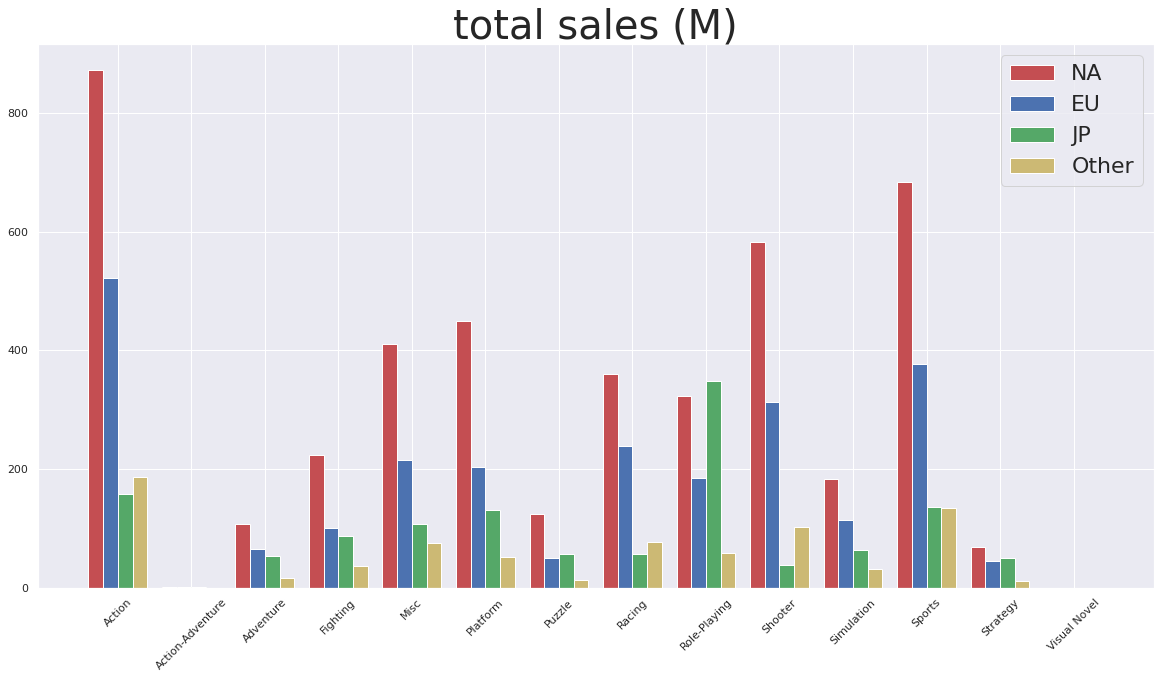

In [37]:
def show_sales_with(data, title, y_label, with_value = "Genre", error = None, error_bar=False):
  fig, ax = plt.subplots()

  sns.set(font_scale=2)
  width = 0.2

  x_ = data[with_value]

  x = np.arange(len(x_))


  if error_bar and error is not None :

    ax.bar(x -3*width/2, data.NA_Sales, width, label = "NA", color = 'r', yerr=error[:, 0], capsize=8)
    ax.bar(x -width/2, data.EU_Sales, width, label = "EU", color = 'b', yerr=error[:, 1], capsize=8)
    ax.bar(x + width/2, data.JP_Sales, width, label = "JP", color = 'g', yerr=error[:, 2], capsize=8)
    ax.bar(x + 3*width/2, data.Other_Sales, width, label = "Other", color = 'y', yerr=error[:, 3], capsize=8)

  else:   
    ax.bar(x -3*width/2, data.NA_Sales, width, label = "NA", color = 'r')
    ax.bar(x -width/2, data.EU_Sales, width, label = "EU", color = 'b')
    ax.bar(x + width/2, data.JP_Sales, width, label = "JP", color = 'g')
    ax.bar(x + 3*width/2, data.Other_Sales, width, label = "Other", color = 'y')

  ax.set_ylabel = y_label
  ax.set_xticks(x)
  ax.set_xticklabels(x_, rotation=45)
  ax.legend()
  plt.title(title, fontsize=40)
  plt.show()

show_sales_with(genre_sum.reset_index(), "total sales (M)", "sales (M)")

판매량을 살펴보면 일본의 RPG을 선호하는 현상을 잠시 예외로 두면 Action 게임의 매출이 각 지역 중에서도 가장 높은 그래프를 가진다. 그러면 우리가 이후에 만들 게임은 Action 게임으로 만들면 되는 것일까?

그러한 결론을 내기 전에 생각해보아야할 것은 1) (3)에서 살펴보았듯이 Action 게임은 판매량과 비슷하게 압도적으로 발매된 게임 수가 많다는 점이다. 따라서 장르에서 발생한 총 판매량이 아니라 해당 장르의 한 타이틀 당 평균 판매량을 보도록 하자.

#### [2] 장르별 평균 판매량

In [38]:
import numpy as np

# 계산법
# :: 총 판매량을 다중 플랫폼에 발매된 플랫폼을 하나로 합친 수의 합 (= 지역에 발매된 타이틀 수) 로 나눈다.

expectation_game_sales_by_genre = genre_sum /np.array(sales_Genre.Genre.value_counts().sort_index()).reshape(-1, 1)

In [39]:
expectation_game_sales_by_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.455902,0.272551,0.082279,0.097292
Action-Adventure,0.495000,0.240000,0.560000,0.070000
Adventure,0.101830,0.061459,0.050162,0.016206
Fighting,0.365777,0.165696,0.142962,0.059984
Misc,0.309841,0.163082,0.081254,0.056873
Platform,0.763192,0.345637,0.222020,0.088506
Puzzle,0.248056,0.101764,0.114850,0.025150
Racing,0.466174,0.309131,0.073528,0.100208
Role-Playing,0.264963,0.151534,0.285546,0.048532


위와 같이 나눈 값은 일견 계산식에 오류는 없기 때문에 문제가 없다고 볼 수 있다.

하지만 각 게임 판매 데이터에서 0으로 집계된 것은 반올림 되어 0.01M도 되지 않았다고 보기보다는 해당 지역에 팔리지 않아서 0으로 집계 되었을 가능성이 높다. 더욱이 데이터에서 국가별 버전을 따로 기록하는 경우도 존재하는 경우도 있다. 

그리고 가령 0.005M 보다도 작은 판매수를 기록해 0으로 반올림 된 결과라고 하더라도 그 수치는 5천 장 미만으로 각 지역은 최소 1억이 넘는 인구를 가지고 있어 5천 미만은 유의미한 데이터로 보기 어렵기 때문에 제외한다.

*   (***가정***)

따라서 이번 데이터 분석에서는 판매량이 0으로 되어있는 값에 대해 해당 국가에서 판매되지 않은 것으로 간주하여 기대값에 카운터하지 않음.

In [40]:
# 판매량이 0보다 큰 값을 True로 변형 한 뒤. 이를 float 로 변환 한 뒤 각 군 마다 이를 합하여 각 지역에 실제로 타이틀 수를 카운트 한다.
# 특정 플랫폼의 타이틀이 특정 지역 한정으로 팔렸을 가능성도 존재하기 때문에 다중 플랫폼 데이터를 하나로 통합하지 않았다.
correct_count = pd.DataFrame(pd.concat([df_.Genre,(df_.take(range(5,9), axis=1) > 0).astype(float)], axis=1).groupby("Genre").sum())
correct_count

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,2569.0,2449.0,1157.0,2147.0
Action-Adventure,1.0,1.0,2.0,1.0
Adventure,554.0,500.0,742.0,460.0
Fighting,594.0,543.0,465.0,499.0
Misc,1207.0,959.0,535.0,1031.0
Platform,800.0,730.0,276.0,605.0
Puzzle,448.0,308.0,156.0,304.0
Racing,1103.0,1022.0,231.0,855.0
Role-Playing,858.0,773.0,1051.0,802.0


이전 계산법에는 각 국가별로 같은 수의 타이틀이 출시되었다고 가정하였지만 이번 계산법에서는 위의 가정(0으로 카운트 된 값은 해당 지역에 출시 되지 않았다고본다)에 의해 각 지역별로 출시된 타이틀을 다르게 계산하였다.

In [41]:
# 따라서 해당 데이터는 만약 타이틀을 여러 플랫폼으로 중복해서 냈다면 아래 기댓값에 x (출시한 서로 다른 플랫폼의 수)를 구하면 된다.
expectation_game_sales_by_genre_correct = genre_sum /correct_count

In [42]:
expectation_game_sales_by_genre_correct

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.339486,0.212899,0.136041,0.086688
Action-Adventure,0.990000,0.480000,0.560000,0.140000
Adventure,0.192816,0.128940,0.070916,0.036957
Fighting,0.376246,0.186446,0.187849,0.073447
Misc,0.339876,0.225151,0.201084,0.073036
Platform,0.561900,0.278877,0.473804,0.086165
Puzzle,0.276295,0.164870,0.367372,0.041283
Racing,0.325857,0.233209,0.245411,0.090363
Role-Playing,0.376445,0.238965,0.331189,0.073766


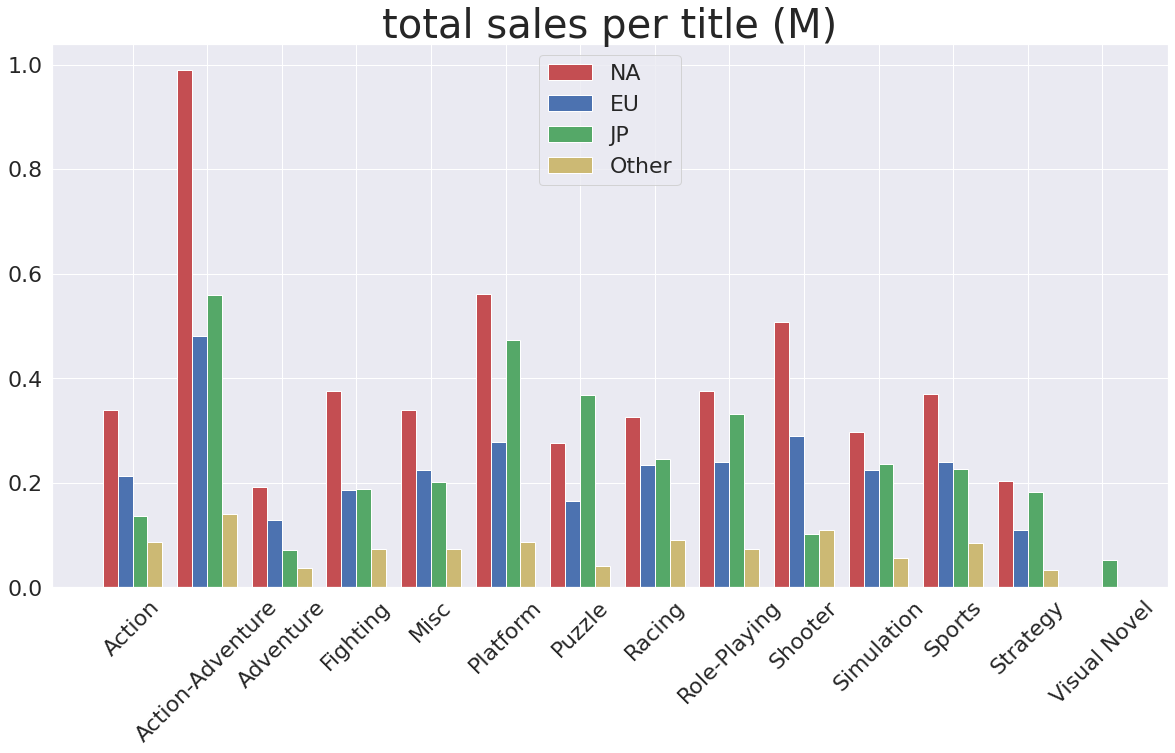

In [43]:
show_sales_with(expectation_game_sales_by_genre_correct.reset_index(), "total sales per title (M)", "sales (M)")

그런데 앞서서 살펴봤듯이 Action-Adventure 및 visual Novel은 데이터가 채 5개도 안되는 데이터이기 때문에 평균값은 즉 통계적인 데이터가 아니라 특정 데이터의 값을 불러오는 것이나 마찬가지이기 때문에 제거하고 보도록 한다.

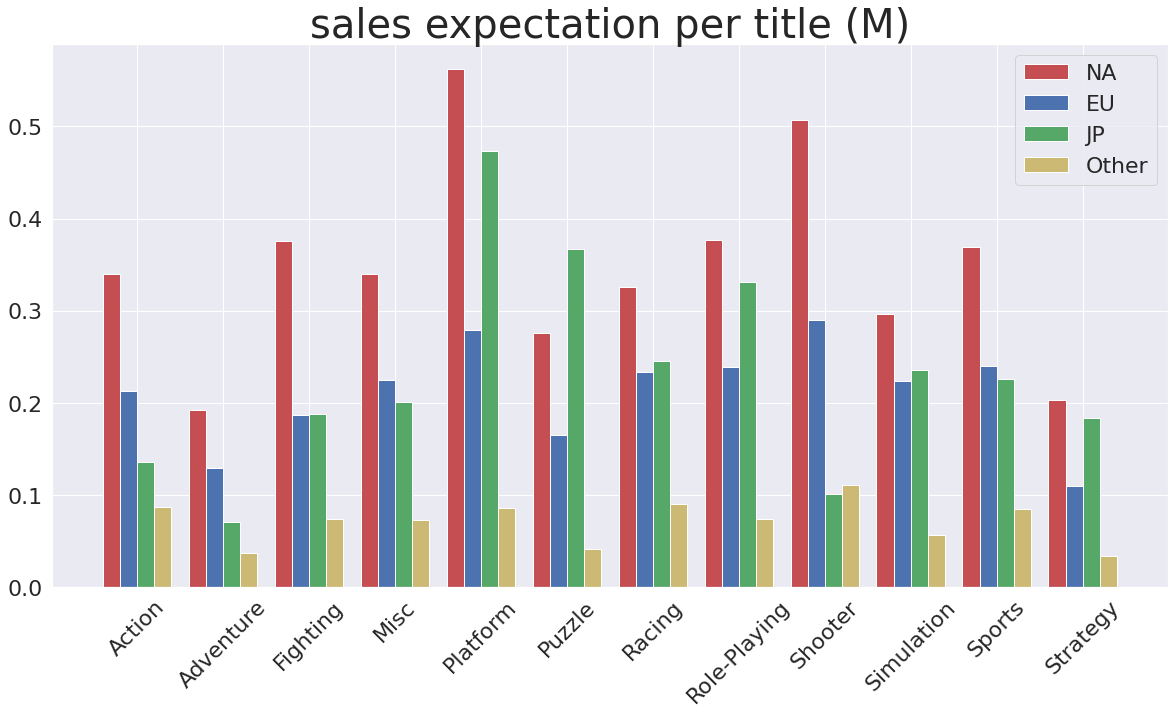

In [44]:
show_sales_with(expectation_game_sales_by_genre_correct.reset_index().drop([1, 13], axis=0), "sales expectation per title (M)", "sales (M)")

총 판매량에서는 Action이 강세였지만 평균 판매량을 보니 오히려 Platform 게임이 전반적으로 우수한 판매량을 기록하는 것을 확인할 수 있다. 그리고 일본 지역을 제외하면 그 다음으로는 슈팅 게임이 그 자리를 차지하고 있다.

#### [3] 평균의 함정

그런데 평균의 함정이라는 말이 존재한다. 평균의 함정은 다음과 같다. "데이터를 모두 더한 후에 그 개수로 나누어 놓은 대푯값인 평균은 매우 크거나 작은 데이터가 있으면, 큰 영향을 받는다. 평균값이 있는 그대로의 실체를 제대로 반영하지 못하는 것을 두고 '평균의 함정'이라고 한다." [\[1\]](https://magazine.securities.miraeasset.com/contents.php?idx=143)

생각해봐야할 문제는 1)에서 판매량 데이터를 (5) ~ (8) 에서 보았듯이 장르 총 매출에서 전체 매출을 견인하는 타이틀이 존재하는 것을 확인할 수 있다. 앞선 항목에서 우리가 구한 장르별 평균 판매량은 0.5M을 넘기가 어려운데 매출 상위 10위의 타이틀은 특정 지역에서는 10M을 넘기 때문이다.

In [45]:
a = df_.groupby(["Genre"])["NA_Sales"].nlargest(10).unstack().T.sum()
b = df_.groupby(["Genre"])["EU_Sales"].nlargest(10).unstack().T.sum()
c = df_.groupby(["Genre"])["JP_Sales"].nlargest(10).unstack().T.sum()
d = df_.groupby(["Genre"])["Other_Sales"].nlargest(10).unstack().T.sum()

In [46]:
top_10 = pd.DataFrame([a,b,c,d]).T
top_10.columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
top_10

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,65.32,48.61,19.56,28.87
Action-Adventure,0.99,0.48,1.12,0.14
Adventure,23.53,15.77,10.00,4.03
Fighting,32.67,16.65,19.04,7.53
Misc,67.44,44.12,24.92,14.33
Platform,112.65,42.48,39.89,11.79
Puzzle,49.20,19.37,21.32,4.28
Racing,61.63,49.90,25.82,21.65
Role-Playing,61.45,47.40,55.71,11.75


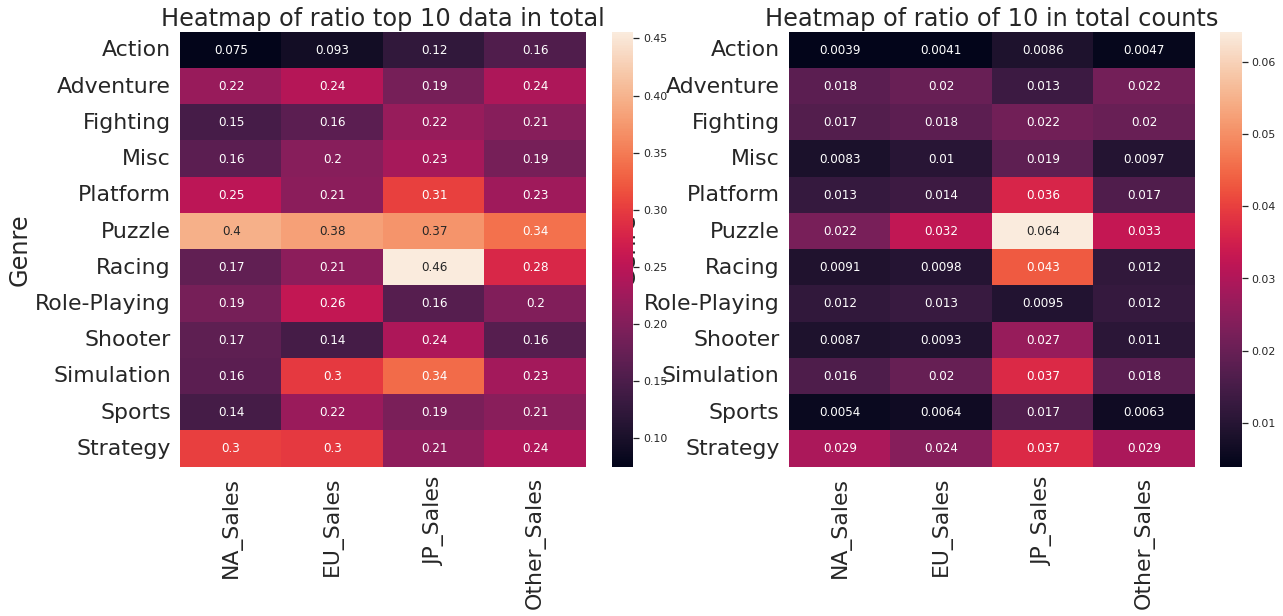

In [47]:
top_10_ratio = top_10 / genre_sum 
top_10_ratio = top_10_ratio.drop(['Action-Adventure','Visual Novel'], axis=0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 8))
sns.set(font_scale = 1)

sns.heatmap(top_10_ratio ,ax = ax1, annot=True)
ax1.title.set_text("Heatmap of ratio top 10 data in total")

sns.heatmap(10 / correct_count.drop(['Action-Adventure','Visual Novel'], axis=0) ,ax = ax2, annot=True)
ax2.title.set_text("Heatmap of ratio of 10 in total counts")
plt.show()

#### [4] 결론

오른쪽 히트맵은 장르에서 상위 10개의 판매량이 전체 판매량에서 어느 정도의 비율을 차지하는지 보여준다.

왼쪽 히트맵은 장르가 가진 타이틀 갯수에서 10이라는 숫자가 차지하는 비율에 대해 나타낸 히트맵이다.

10이라는 숫자는 어느 장르에서든 7%를 채 차지 하지 못하는 수이지만 판매량에서는 대부분의 데이터에서 10% 이상의 비중을 가지며 심한 경우에는 거의 50%의 판매량을 떠맡고 있는 데이터이다.

따라서 평균 판매량이라는 [2]의 그래프만을 봤을 때는 Platform이라는 장르가 평균적으로 우수한 판매량을 기록하고 있지만 그 내부의 상위값들을 들여다보면 성공한 몇몇 타이틀이 해당 장르의 판매량을 견인하고 있다는 사실을 알 수 있다. 따라서 두 통계를 확인했을 때는 어떤 것이 우세하다고 정확히 말하기 어렵다.

 Action 장르를 예를 들면, 총 판매량이 높아 선호되었지만, 평균 판매량에서는 성적이 비교적 저조했다. 하지만 다시 상위 10개의 판매량의 비율을 보면 현저히 낮기 때문에 Action 장르가 부적합하다고 말하기도 어렵기 때문이다.

In [48]:
df_nan = df_.replace(0, np.nan)
df_nan_std = df_nan.groupby("Genre").std(ddof=1).drop(["Action-Adventure", "Visual Novel"])
correct_count_drop = correct_count.drop(["Action-Adventure","Visual Novel"])

In [49]:
from scipy.stats import t 
error = t.ppf(0.975, correct_count_drop-1, scale=df_nan_std/np.sqrt(correct_count_drop))

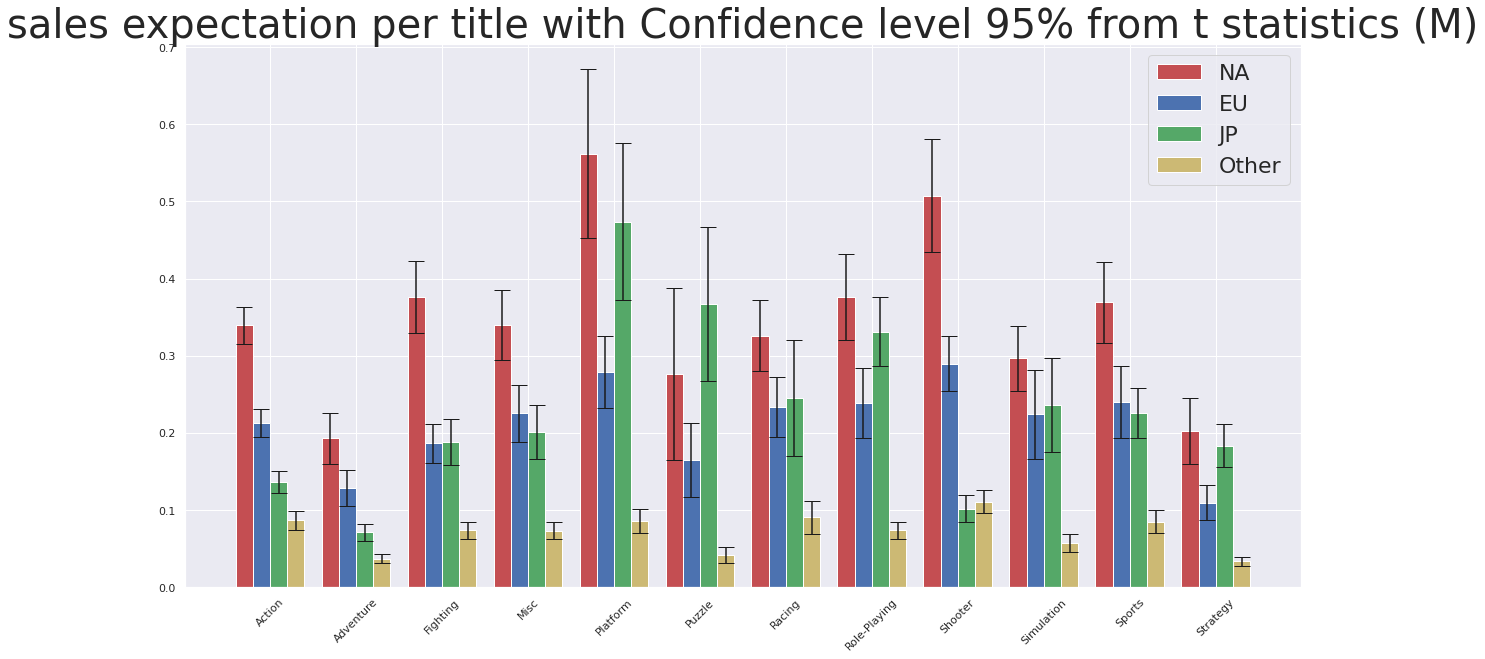

In [50]:
show_sales_with(expectation_game_sales_by_genre_correct.reset_index().drop([1, 13], axis=0),
                "sales expectation per title with Confidence level 95% from t statistics (M)", "sales (M)", error_bar=True, error = error)

T score를 통해 신뢰구간을 95%로 지정하고 각 장르의 기댓값에 error bar 형태로 표시한 결과이다. 신뢰구간은 모수 평균이 포함될 것으로 예측되는 범위를 나타낸다. 변동 폭이 좁은 그래프는 분산이 적다는 의미이기도 하다. 

그런데 우리가 알고 싶은 실제 데이터는 우리가 가진 데이터에 대한 모수가 아니라 2022년 4분기에 어떤 게임이 선호를 받는 것인지 알고 싶다는 것이기 때문에 통계적 검증을 통해 신뢰성을 보장받을 필요가 있다. 이는 다음 장에서 진행하겠다.

### (2) 연도 별 게임 트렌드

앞선 항목, (1) 게임 장르별 매출의 지역간 비교를 통해 우리가 안 사실은 기대값과 판매량의 독점, 그리고 분산 등의 이유로 어떤 것이 제일 선호되는 장르인지는 아직 알 수 없지만, 직관적으로 확인할 수 있는 건 게임 장르에 대한 선호도가 동일하지 않고 서로 다를 것이다. 라는 점이다. (물론 이에 대한 통계적 검증도 필요하다)

그렇다면 문제는 그 선호도가 전체적으로 동일한 건지, 아니면 시대에 흐름에 따라 변경되는지 알 필요가 있다. 앞선 항목에 대한 질문의 답을 얻었는 데 이 것이 과거의 트렌드를 반영한 것이었다면 낭패를 볼 것이 분명하다. 우리는 가급적 최신의 선호 트렌드를 좆아서 게임을 만들고 싶기 때문에 시대에 따른 트렌드를 분석하는 것은 중요하다.

즉 각 지역의 장르 선호도가 고유한 것인지 유행에 따른 것인지 알아야한다.

In [52]:
df_.Year = df_.Year.astype(int)

#### [1] 데이터 포인트를 이용한 시각화

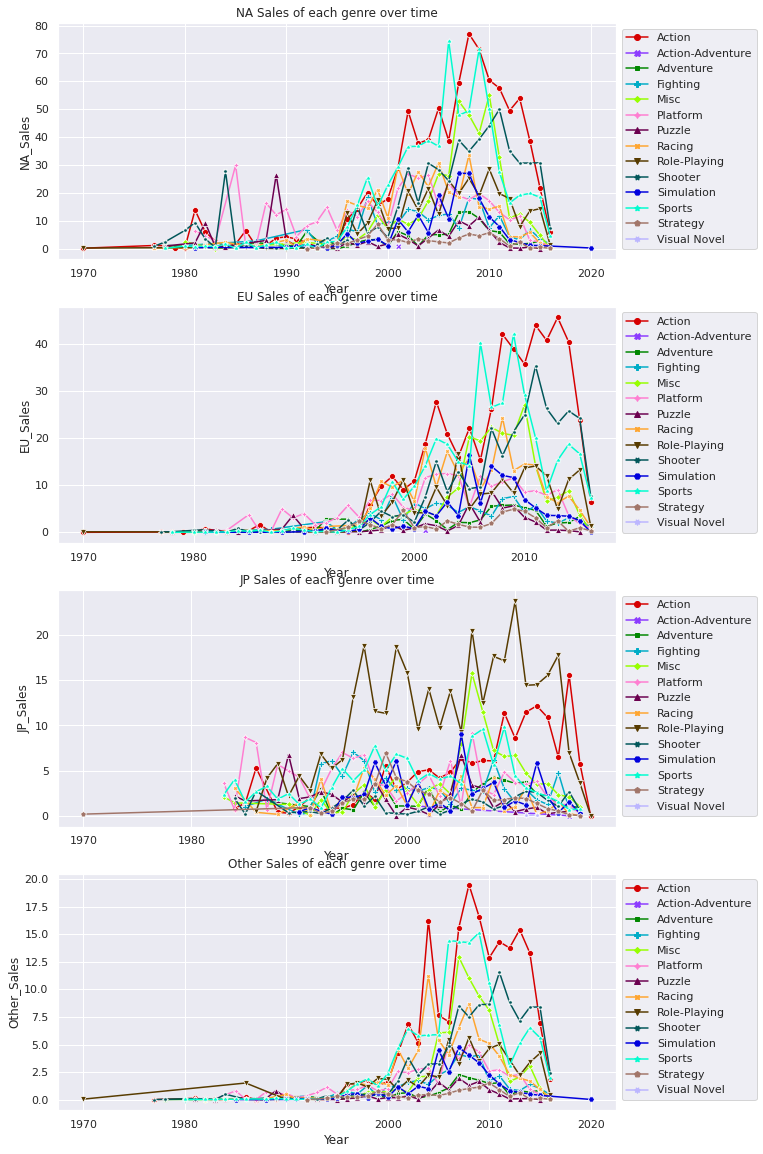

In [159]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10, 20))
sns.set(font_scale=1)
data = df_.groupby(["Genre", "Year"]).sum().reset_index().replace(0, np.nan)

palette = sns.color_palette(cc.glasbey, n_colors=14)


sns.lineplot(data = data, x = "Year", y = "NA_Sales", hue="Genre", ax=ax1, palette=palette, style="Genre",markers=True, dashes=False)
ax1.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax1.title.set_text("NA Sales of each genre over time")
sns.lineplot(data = data, x = "Year", y = "EU_Sales", hue="Genre", ax=ax2, palette=palette, style="Genre",markers=True, dashes=False)
ax2.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax2.title.set_text("EU Sales of each genre over time")

sns.lineplot(data = data, x = "Year", y = "JP_Sales", hue="Genre", ax=ax3, palette=palette, style="Genre",markers=True, dashes=False)
ax3.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax3.title.set_text("JP Sales of each genre over time")

sns.lineplot(data = data, x = "Year", y = "Other_Sales", hue="Genre", ax=ax4, palette=palette, style="Genre",markers=True, dashes=False)
ax4.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax4.title.set_text("Other Sales of each genre over time")
plt.show()

#### [2] 이동평균 함수를 통한 트렌드 시각화

해당 그래프는 선이 너무 복잡하여 해석하기 난잡한데, 해당 항목에서는 데이터의 정확한 값이 아니라 시간의 흐름에 따른 게임 트렌드를 분석하고자 함이므로 이동평균 함수를 이용하였다.

 하지만 우리는 현재의 트렌드를 나타내는 지점에 미치는 영향력이 현재 지점이 가장 높고 과거로 갈수록 영향력을 낮추기 위해 가중이동 평균을 사용하였다.

In [127]:
df_removed = df_.drop(df_.loc[(df_.Genre == "Action-Adventure") + (df_.Genre== "Visual Novel")].index)

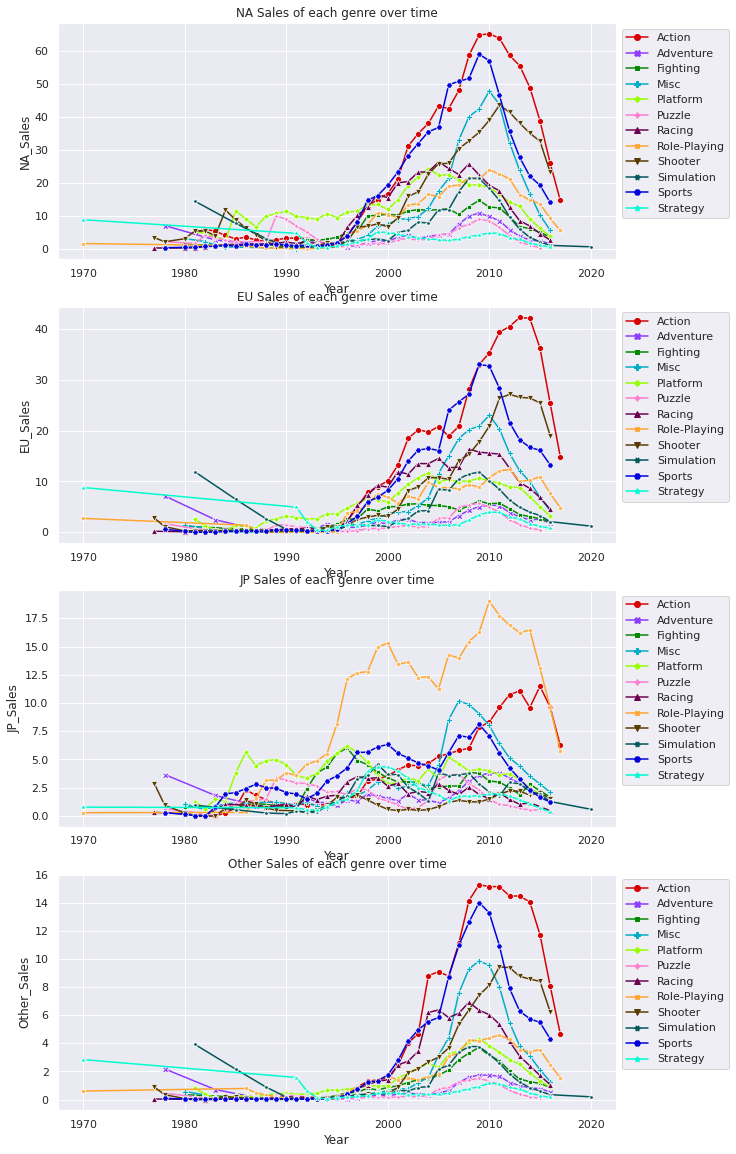

In [164]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10, 20))
sns.set(font_scale=1)
palette = sns.color_palette(cc.glasbey, n_colors=12)
window_size = 6

weights = np.arange(window_size).astype(float)
weights /= weights.sum()

data = df_removed.groupby(["Genre", "Year"]).sum().rolling(window_size).apply(lambda x : np.sum(weights*x))

sns.lineplot(data = data, x = "Year", y = "NA_Sales", hue="Genre", ax=ax1, palette=palette , style="Genre",markers=True, dashes=False)
ax1.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax1.title.set_text("NA Sales of each genre over time")
sns.lineplot(data = data, x = "Year", y = "EU_Sales", hue="Genre", ax=ax2, palette=palette , style="Genre",markers=True, dashes=False)
ax2.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax2.title.set_text("EU Sales of each genre over time")

sns.lineplot(data = data, x = "Year", y = "JP_Sales", hue="Genre", ax=ax3, palette=palette , style="Genre",markers=True, dashes=False)
ax3.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax3.title.set_text("JP Sales of each genre over time")

sns.lineplot(data = data, x = "Year", y = "Other_Sales", hue="Genre", ax=ax4, palette=palette, style="Genre",markers=True, dashes=False )
ax4.legend(loc = "upper left", bbox_to_anchor=(1,1))
ax4.title.set_text("Other Sales of each genre over time")
plt.show()

시각적으로 봤을 때는 일본 지역을 제외한 모든 지역에서 1990년 대 중반 쯤부터 게임의 트렌드가 바뀌는 것을 확인할 수 있다.

1990년 중반 이전까지는 몇 가지 장르가 얽혀있다가 1990년대 중반 이후부터 액션, 어드벤처, 전략, 슈팅 게임이 트렌드를 장악한다.

일본의 경우에는 격변의 1990년대 초반을 지나면 RPG 게임이 유행을 하기 시작하며 뒤이어 다른 지역처럼 전략게임과 액션 게임이 트렌드로 등장한다.


### (3) 장르별 판매량이 높은 게임 그리고 가장 많이 팔린 게임

이제까지의 가정은 이제부터 제작할 게임의 수준이 평균 언저리에 있을 때 어떤 선택이 안정적인가에 대한 고민이었다고 할 수 있다.

하지만 제작된 게임을 평균 이상의 게임성을 갖추어 제작할 수 있다고 가정한다면 또 다른 문제에 직면한다. 게임의 장르마다 수요가 다르기 때문에 아무리 좋은 게임을 만들어도 해당 장르에 대한 수요가 전체 게이머 인구 대비 10% 밖에 안된다면 그 게임은 10%에게만 팔 수 있는 게임이다.

따라서 특정 장르에 대한 수요층을 사전에 조사할 필요가 있는 데, 우리가 가진 한정된 데이터로 간접적으로 이를 추정해볼 수 있는 방법은 판매량이 높은 게임들에 대해 분석하는 것이다.

왜냐하면 게이머가 수용할 수 있는 장르가 불변하다고 가정할 때, A 장르를 수용할 수 있는 게이머 집합를 $A_p$라고 하고 A 장르의 게임에 임의의 순서를 부여하여 i번째 게임의 판매량을 $g_A^i$라고 할 때 항상 아래와 같은 관계가 성립한다.

$|A_p| \geq g_A^i$

인데 우리는 $A_p$ 대한 정확한 값을 알 수 없으므로 반대로 $g_A^i$를 통해 $|A_p|$ 를 추정할 수 밖에 없다. 이 때 $|A_p|$의 하한의 최댓값을 구하는 방법은 $g_A^i$가 최대인 i를 구하는 것이다. 

In [287]:
def get_top_10_elements(df, attr, largest=1):

  df_temp = df.groupby("Genre")[attr].nlargest(largest).to_frame().reset_index()
  df_temp.columns = ["Genre", "idx", attr]
  return df_temp

In [282]:
NA = get_top_10_elements(df_removed, "NA_Sales")
EU = get_top_10_elements(df_removed, "EU_Sales")
JP = get_top_10_elements(df_removed, "JP_Sales")
Other = get_top_10_elements(df_removed, "Other_Sales")

#### [1] 북미 지역

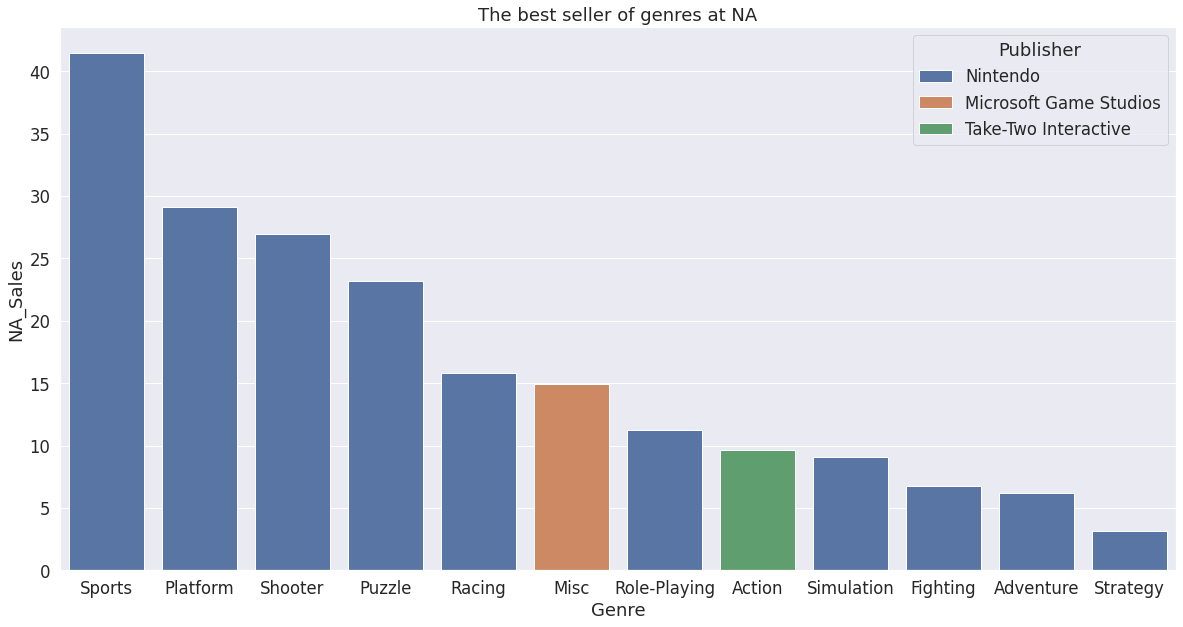

2904                             Wii Sports
4194                      Super Mario Bros.
10478                             Duck Hunt
1202                                 Tetris
12568                        Mario Kart Wii
4338                     Kinect Adventures!
7823               Pokemon Red/Pokemon Blue
10903                    Grand Theft Auto V
11127                            Nintendogs
14890               Super Smash Bros. Brawl
6841     Super Mario Land 2: 6 Golden Coins
9642                        Pokemon Stadium
Name: Name, dtype: object


In [284]:
sns.set(font_scale=1.5)
data = df_removed.loc[NA.idx].sort_values('NA_Sales', ascending=False)
sns.barplot(data = data, x="Genre", y="NA_Sales", hue="Publisher", dodge=False)
plt.title("The best seller of genres at NA")
plt.show()
print(data.Name)

북미 지역에서 장르별로 가장 많이 팔린 게임들의 순위는 스포츠, 플랫폼, 슈팅, 퍼즐 게임 등이다. 특기할만한 점은 1) (5)에서의 표처럼 nintendo 강세라는 것이다.

#### [2] 유럽 지역

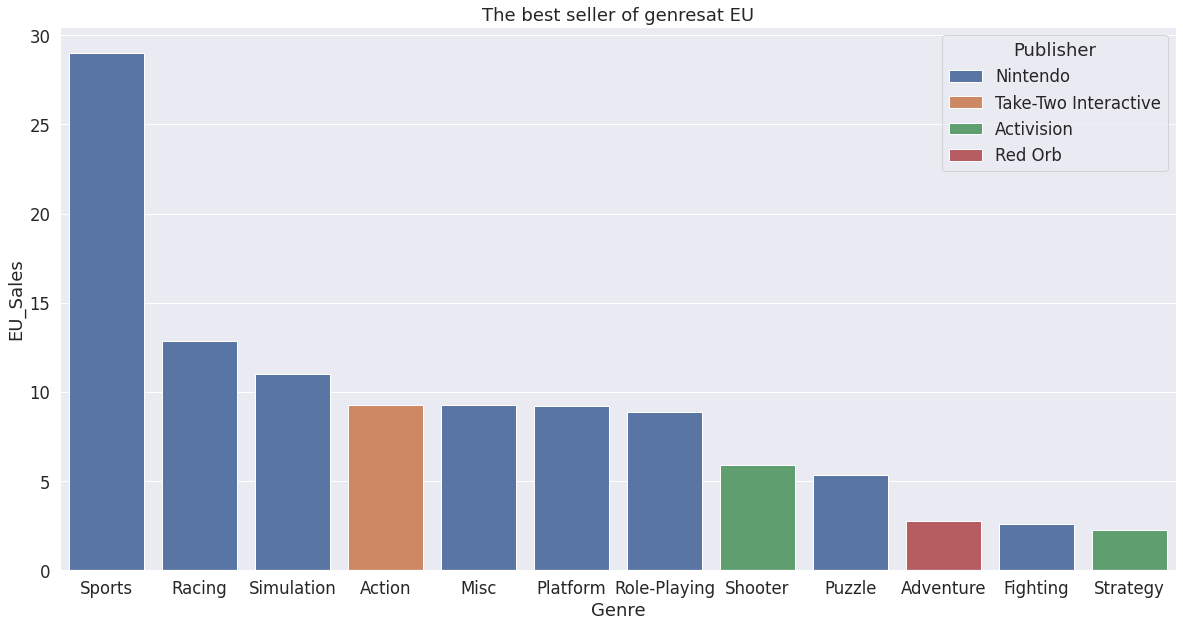

2904                                       Wii Sports
12568                                  Mario Kart Wii
11127                                      Nintendogs
3478                               Grand Theft Auto V
13218    Brain Age: Train Your Brain in Minutes a Day
6931                            New Super Mario Bros.
7823                         Pokemon Red/Pokemon Blue
4235                       Call of Duty: Black Ops II
511       Brain Age 2: More Training in Minutes a Day
9546                                             Myst
14890                         Super Smash Bros. Brawl
4784                   Warcraft II: Tides of Darkness
Name: Name, dtype: object


In [286]:
data = df_removed.loc[EU.idx].sort_values('EU_Sales', ascending=False)
sns.barplot(data = data, x="Genre", y="EU_Sales", hue="Publisher", dodge=False)
plt.title("The best seller of genresat EU")
plt.show()
print(data.Name)

유럽 또한 스포츠 게임이 장르들의 베스트 셀러들 사이에서 가장 많이 팔렸다. 또한 특기할만한 점은 1) (6)에서 본 그래프에서는 배급사가 고르게 분포되어있었는데, 현재 그래프에서는 닌텐도 사의 게임들이 우세하다는 것이다.

#### [3] 일본 지역

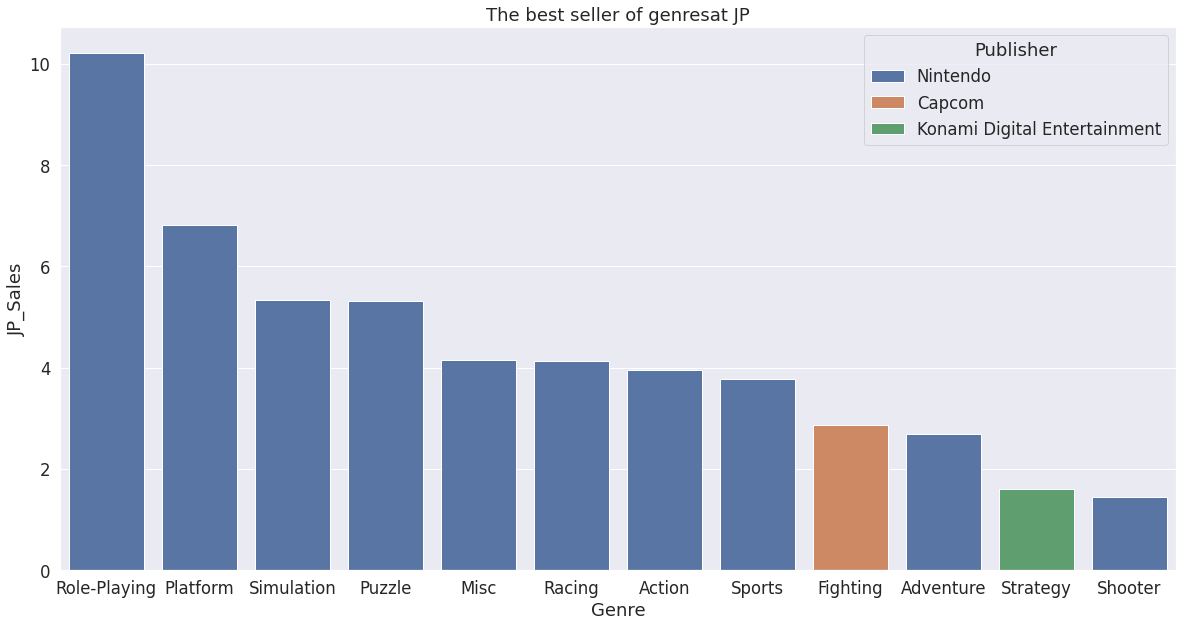

7823                         Pokemon Red/Pokemon Blue
4194                                Super Mario Bros.
3268                      Animal Crossing: Wild World
511       Brain Age 2: More Training in Minutes a Day
13218    Brain Age: Train Your Brain in Minutes a Day
10640                                   Mario Kart DS
4801             Pokemon HeartGold/Pokemon SoulSilver
2904                                       Wii Sports
12557            Street Fighter II: The World Warrior
6841               Super Mario Land 2: 6 Golden Coins
12517                         Yu-Gi-Oh! Duel Monsters
5687                                         Splatoon
Name: Name, dtype: object


In [288]:
data = df_removed.loc[JP.idx].sort_values('JP_Sales', ascending=False)
sns.barplot(data = data, x="Genre", y="JP_Sales", hue="Publisher", dodge=False)
plt.title("The best seller of genres at JP")
plt.show()
print(data.Name)

다른 지역과 동일하게 Nintendo가 대부분의 장르에서 best seller를 차지한건 동일하나 Sport, 즉 wii sport가 1위를 차지 하지 못했다.

#### [4] 기타 지역

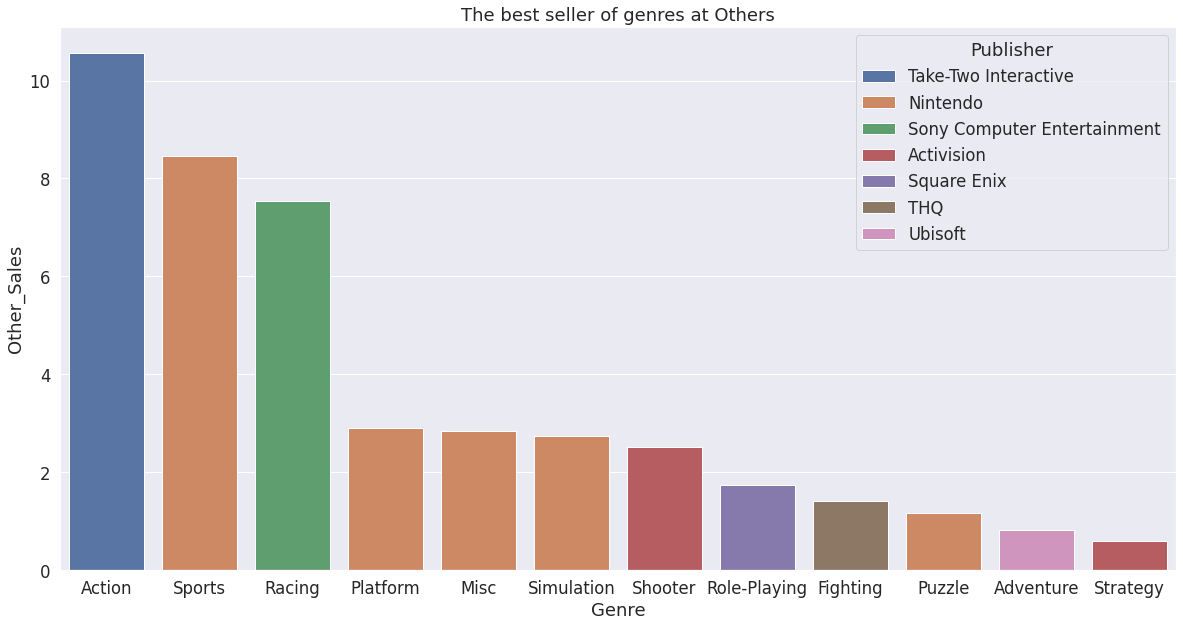

14657                  Grand Theft Auto: San Andreas
2904                                      Wii Sports
14653                                 Gran Turismo 4
6931                           New Super Mario Bros.
3010                                        Wii Play
11127                                     Nintendogs
4235                      Call of Duty: Black Ops II
9480                               Final Fantasy XII
4848                       WWE SmackDown vs Raw 2008
511      Brain Age 2: More Training in Minutes a Day
8025                                Assassin's Creed
2821                  StarCraft II: Wings of Liberty
Name: Name, dtype: object


In [290]:
data = df_removed.loc[Other.idx].sort_values('Other_Sales', ascending=False)
sns.barplot(data = data, x="Genre", y="Other_Sales", hue="Publisher", dodge=False)
plt.title("The best seller of genres at Others")
plt.show()
print(data.Name)

1) (8)의 그래프의 경향과 유사하게 배급사가 분포되어있고, 여전히 nintendo 게임이 많긴 하지만 다양하게 각 장르별 best seller가 분포되어있다.

#### [5] 전 지역

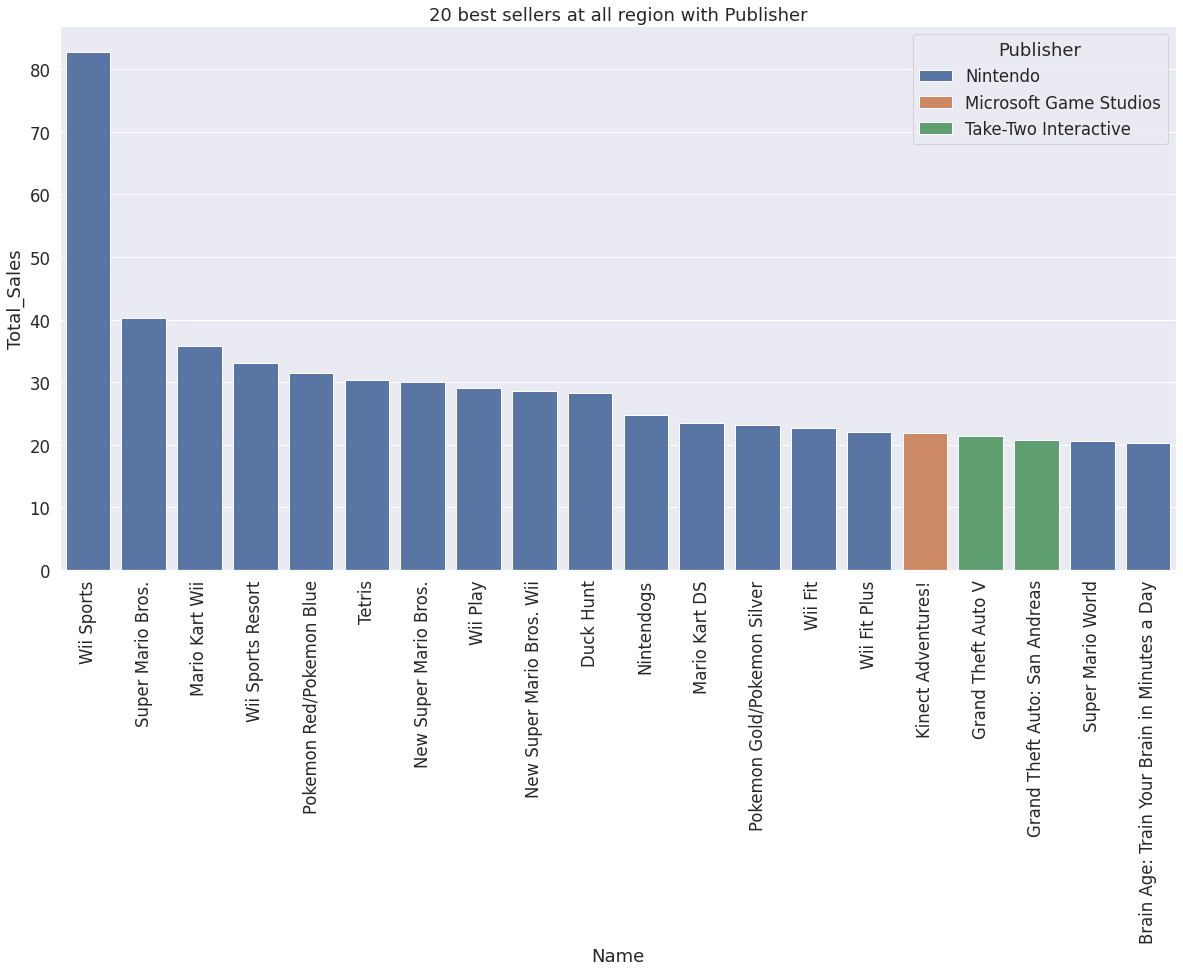

In [270]:
total = df_removed.take(range(5,9), axis=1).sum(axis=1).nlargest(20).to_frame().reset_index()
total.columns = ["idx", "Total_Sales"]
total['Name'] = df_removed.Name.loc[total.idx].tolist()
total["Publisher"] = df_removed.Publisher.loc[total.idx].tolist()
total["Genre"] = df_removed.Genre.loc[total.idx].tolist()
fig, ax = plt.subplots()
sns.barplot(data = total, y= "Total_Sales", x="Name", hue="Publisher", dodge=False, ax=ax)
plt.title("20 best sellers at all region with Publisher")
ax.set_xticklabels(total.Name, rotation=90)
plt.show()

전 지역을 대상으로 했을 때는 다른 지역의 인기에 힘 입어서 Wii Sport가 1등 타이틀이고 20위 권 내의 대다수의 게임이 Nintendo 게임인 것을 확인할 수 있다.

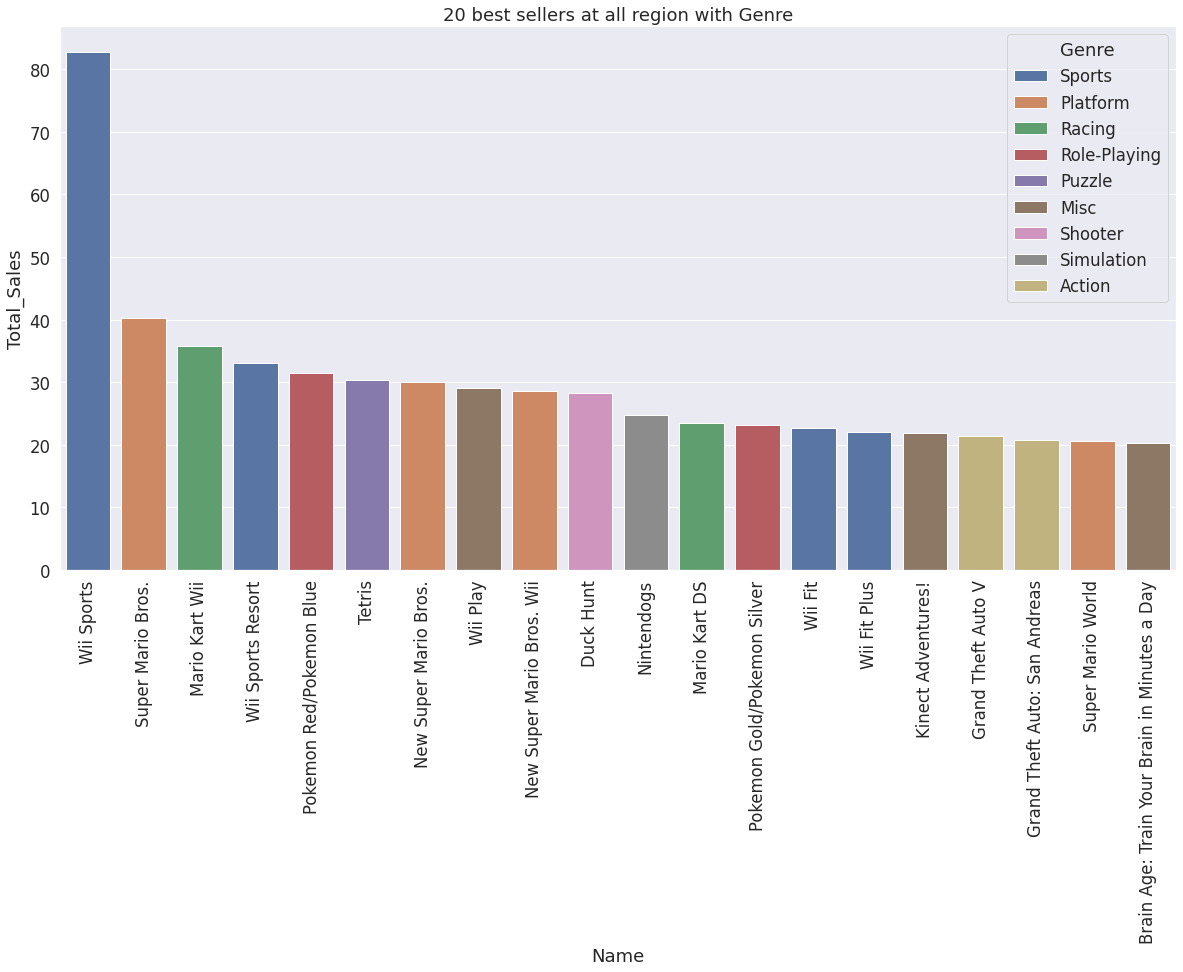

In [271]:
fig, ax = plt.subplots()
sns.barplot(data = total, y= "Total_Sales", x="Name", hue="Genre", dodge=False, ax=ax)
ax.set_xticklabels(total.Name, rotation=90)
plt.title("20 best sellers at all region with Genre")
plt.show()

위의 그래프의 Hue를 배급사가 아닌 장르로 적용했을 때의 그래프이다. 

각 장르를 살펴보면 각 장르를 주름잡는 시리즈들을 구별해낼 수 있다.

Sport는 wii 계열이, Platform 장르의 게임들은 Mario 시리즈가, 레이싱 게임은 mario kart 시리즈가, RPG는 Pokemon 시리즈가, action 게임은 GTA 시리즈가 각 장르를 주름 잡는 것을 확인할 수 있다.